In [1]:
from datetime import datetime
import time
import numpy as np
import pandas as pd
from pykrx import stock

In [4]:
latest_date = '20230719'

In [5]:
def get_stock_fundamental(date, ticker):
    # 펀더멘탈 정보 읽어 오기
    df_stock = stock.get_market_fundamental(date, date, ticker)
    # 인덱스 이름 제거
    df_stock.index.name = None
    # 인덱스를 티커로 변경
    df_stock.index = [ticker]
    # 이름 읽어 오기
    name = stock.get_market_ticker_name(ticker)
    # 첫 번째 열에 삽입하기
    df_stock.insert(0, 'Name', name)
    # 주식 데이터 리턴
    return df_stock

In [6]:
# 코스피 상장 주식을 시가총액 순으로 가져 오기
df_kospi = stock.get_market_cap(latest_date, market='KOSPI')

In [11]:
len(df_kospi)

948

In [8]:
df_kospi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 005930 to 002787
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   종가      948 non-null    int64
 1   시가총액    948 non-null    int64
 2   거래량     948 non-null    int64
 3   거래대금    948 non-null    int64
 4   상장주식수   948 non-null    int64
dtypes: int64(5)
memory usage: 44.4+ KB


In [12]:
#주가 펀더멘탈 정보 가져 오기
df_kospi_target = None
start_time = time.time()
#for idx, ticker in enumerate(df_kospi.head(200).index):
for idx, ticker in enumerate(df_kospi.index):
    print(f'{idx+1:03d}: {ticker}')
    df_stock_fundamental = get_stock_fundamental(latest_date, ticker)
    display(df_stock_fundamental)
    if df_kospi_target is None:
        df_kospi_target = df_stock_fundamental
    else:
        df_kospi_target = pd.concat([df_kospi_target, df_stock_fundamental])
    time.sleep(1)
end_time = time.time()
print('')
print('')
print('*'*50)
print(f'소요 시간: {round(end_time - start_time)} seconds')
print('*'*50)

001: 005930


,Name,BPS,PER,PBR,EPS,DIV,DPS
005930,삼성전자,57822,8.9,1.24,8057,2.01,1444


002: 373220


,Name,BPS,PER,PBR,EPS,DIV,DPS
373220,LG에너지솔루션,80052,169.39,7.0,3306,0.0,0


003: 000660


,Name,BPS,PER,PBR,EPS,DIV,DPS
000660,SK하이닉스,92004,36.24,1.28,3242,1.02,1200


004: 207940


,Name,BPS,PER,PBR,EPS,DIV,DPS
207940,삼성바이오로직스,126233,64.76,5.87,11442,0.0,0


005: 005935


,Name,BPS,PER,PBR,EPS,DIV,DPS
005935,삼성전자우,0,0.0,0.0,0,2.42,1445


006: 051910


,Name,BPS,PER,PBR,EPS,DIV,DPS
051910,LG화학,445524,29.02,1.54,23670,1.46,10000


007: 006400


,Name,BPS,PER,PBR,EPS,DIV,DPS
006400,삼성SDI,251948,23.81,2.76,29191,0.15,1030


008: 005380


,Name,BPS,PER,PBR,EPS,DIV,DPS
005380,현대차,407147,7.08,0.5,28521,3.47,7000


009: 005490


,Name,BPS,PER,PBR,EPS,DIV,DPS
005490,POSCO홀딩스,692323,12.05,0.72,41456,2.4,12000


010: 003670


,Name,BPS,PER,PBR,EPS,DIV,DPS
003670,포스코퓨처엠,31922,314.34,15.04,1527,0.06,300


011: 000270


,Name,BPS,PER,PBR,EPS,DIV,DPS
000270,기아,98117,6.37,0.88,13495,4.07,3500


012: 035420


,Name,BPS,PER,PBR,EPS,DIV,DPS
035420,NAVER,151646,40.84,1.35,5007,0.45,914


013: 012330


,Name,BPS,PER,PBR,EPS,DIV,DPS
012330,현대모비스,410816,8.98,0.59,27163,1.64,4000


014: 035720


,Name,BPS,PER,PBR,EPS,DIV,DPS
035720,카카오,22893,16.23,2.2,3106,0.12,60


015: 068270


,Name,BPS,PER,PBR,EPS,DIV,DPS
068270,셀트리온,28937,39.96,5.18,3751,0.25,375


016: 066570


,Name,BPS,PER,PBR,EPS,DIV,DPS
066570,LG전자,116599,18.6,1.06,6640,0.57,700


017: 105560


,Name,BPS,PER,PBR,EPS,DIV,DPS
105560,KB금융,124124,4.4,0.39,10955,6.13,2950


018: 028260


,Name,BPS,PER,PBR,EPS,DIV,DPS
028260,삼성물산,164524,8.29,0.63,12460,2.23,2300


019: 055550


,Name,BPS,PER,PBR,EPS,DIV,DPS
055550,신한지주,95206,3.97,0.35,8454,6.15,2065


020: 096770


,Name,BPS,PER,PBR,EPS,DIV,DPS
096770,SK이노베이션,233338,9.16,0.73,18511,3.45,5840


021: 032830


,Name,BPS,PER,PBR,EPS,DIV,DPS
032830,삼성생명,124081,7.84,0.56,8817,4.34,3000


022: 003550


,Name,BPS,PER,PBR,EPS,DIV,DPS
003550,LG,164082,6.96,0.53,12422,3.47,3000


023: 015760


,Name,BPS,PER,PBR,EPS,DIV,DPS
015760,한국전력,63158,0.0,0.32,0,0.0,0


024: 329180


,Name,BPS,PER,PBR,EPS,DIV,DPS
329180,HD현대중공업,59566,0.0,2.43,0,0.0,0


025: 323410


,Name,BPS,PER,PBR,EPS,DIV,DPS
323410,카카오뱅크,11988,46.11,2.13,553,0.31,80


026: 086790


,Name,BPS,PER,PBR,EPS,DIV,DPS
086790,하나금융지주,124935,3.28,0.31,11803,8.65,3350


027: 009150


,Name,BPS,PER,PBR,EPS,DIV,DPS
009150,삼성전기,103702,11.81,1.48,12977,1.37,2100


028: 034020


,Name,BPS,PER,PBR,EPS,DIV,DPS
034020,두산에너빌리티,11146,0.0,1.59,0,0.0,0


029: 033780


,Name,BPS,PER,PBR,EPS,DIV,DPS
033780,KT&G,80114,9.66,1.02,8489,6.1,5000


030: 000810


,Name,BPS,PER,PBR,EPS,DIV,DPS
000810,삼성화재,276525,7.89,0.86,30113,5.81,13800


031: 352820


,Name,BPS,PER,PBR,EPS,DIV,DPS
352820,하이브,66995,208.3,3.93,1265,0.0,0


032: 034730


,Name,BPS,PER,PBR,EPS,DIV,DPS
034730,SK,391404,7.52,0.38,19547,3.4,5000


033: 042660


,Name,BPS,PER,PBR,EPS,DIV,DPS
042660,한화오션,6945,0.0,6.7,0,0.0,0


034: 018260


,Name,BPS,PER,PBR,EPS,DIV,DPS
018260,삼성에스디에스,106311,9.12,1.22,14218,2.47,3200


035: 017670


,Name,BPS,PER,PBR,EPS,DIV,DPS
017670,SK텔레콤,51911,10.93,0.87,4118,7.38,3320


036: 138040


,Name,BPS,PER,PBR,EPS,DIV,DPS
138040,메리츠금융지주,27050,5.38,1.67,8406,0.23,105


037: 003490


,Name,BPS,PER,PBR,EPS,DIV,DPS
003490,대한항공,24426,5.32,1.04,4787,2.95,750


038: 011200


,Name,BPS,PER,PBR,EPS,DIV,DPS
011200,HMM,42300,0.93,0.45,20556,6.31,1200


039: 010130


,Name,BPS,PER,PBR,EPS,DIV,DPS
010130,고려아연,455251,10.76,1.02,42967,4.32,20000


040: 009540


,Name,BPS,PER,PBR,EPS,DIV,DPS
009540,HD한국조선해양,137382,0.0,0.92,0,0.0,0


041: 259960


,Name,BPS,PER,PBR,EPS,DIV,DPS
259960,크래프톤,108962,17.19,1.68,10666,0.0,0


042: 316140


,Name,BPS,PER,PBR,EPS,DIV,DPS
316140,우리금융지주,39505,2.78,0.3,4191,9.69,1130


043: 047050


,Name,BPS,PER,PBR,EPS,DIV,DPS
047050,포스코인터내셔널,32288,9.82,1.45,4780,2.13,1000


044: 024110


,Name,BPS,PER,PBR,EPS,DIV,DPS
024110,기업은행,36302,3.07,0.28,3320,9.43,960


045: 010950


,Name,BPS,PER,PBR,EPS,DIV,DPS
010950,S-Oil,75353,3.86,0.93,18075,7.88,5500


046: 030200


,Name,BPS,PER,PBR,EPS,DIV,DPS
030200,KT,64880,5.64,0.45,5209,6.67,1960


047: 009830


,Name,BPS,PER,PBR,EPS,DIV,DPS
009830,한화솔루션,47292,23.73,0.94,1873,0.0,0


048: 010140


,Name,BPS,PER,PBR,EPS,DIV,DPS
010140,삼성중공업,4209,0.0,2.03,0,0.0,0


049: 051900


,Name,BPS,PER,PBR,EPS,DIV,DPS
051900,LG생활건강,364213,32.17,1.25,14112,0.88,4000


050: 086280


,Name,BPS,PER,PBR,EPS,DIV,DPS
086280,현대글로비스,183094,5.93,1.03,31729,3.03,5700


051: 011070


,Name,BPS,PER,PBR,EPS,DIV,DPS
011070,LG이노텍,180261,6.96,1.6,41406,1.44,4150


052: 377300


,Name,BPS,PER,PBR,EPS,DIV,DPS
377300,카카오페이,13583,122.73,3.68,407,0.0,0


053: 402340


,Name,BPS,PER,PBR,EPS,DIV,DPS
402340,SK스퀘어,118972,25.29,0.39,1837,0.0,0


054: 361610


,Name,BPS,PER,PBR,EPS,DIV,DPS
361610,SK아이이테크놀로지,30501,0.0,2.99,0,0.0,0


055: 012450


,Name,BPS,PER,PBR,EPS,DIV,DPS
012450,한화에어로스페이스,56612,32.27,2.26,3964,0.78,1000


056: 001570


,Name,BPS,PER,PBR,EPS,DIV,DPS
001570,금양,2188,0.0,50.869999,0,0.0,0


057: 326030


,Name,BPS,PER,PBR,EPS,DIV,DPS
326030,SK바이오팜,4042,0.0,20.190001,0,0.0,0


058: 028050


,Name,BPS,PER,PBR,EPS,DIV,DPS
028050,삼성엔지니어링,13741,9.57,2.36,3392,0.0,0


059: 036570


,Name,BPS,PER,PBR,EPS,DIV,DPS
036570,엔씨소프트,157391,13.4,1.83,21456,2.32,6680


060: 011170


,Name,BPS,PER,PBR,EPS,DIV,DPS
011170,롯데케미칼,404799,85.2,0.36,1716,2.39,3500


061: 005070


,Name,BPS,PER,PBR,EPS,DIV,DPS
005070,코스모신소재,8199,222.04,24.700001,912,0.0,0


062: 090430


,Name,BPS,PER,PBR,EPS,DIV,DPS
090430,아모레퍼시픽,82107,54.28,1.29,1949,0.64,680


063: 241560


,Name,BPS,PER,PBR,EPS,DIV,DPS
241560,두산밥캣,50136,9.25,1.18,6421,2.27,1350


064: 302440


,Name,BPS,PER,PBR,EPS,DIV,DPS
302440,SK바이오사이언스,22683,47.62,3.35,1596,0.0,0


065: 034220


,Name,BPS,PER,PBR,EPS,DIV,DPS
034220,LG디스플레이,27611,0.0,0.54,0,0.0,0


066: 005830


,Name,BPS,PER,PBR,EPS,DIV,DPS
005830,DB손해보험,89508,4.4,0.81,16373,6.38,4600


067: 047810


,Name,BPS,PER,PBR,EPS,DIV,DPS
047810,한국항공우주,14648,43.05,3.57,1215,0.48,250


068: 088980


,Name
088980,맥쿼리인프라


069: 018880


,Name,BPS,PER,PBR,EPS,DIV,DPS
018880,한온시스템,4190,242.11,2.2,38,3.91,360


070: 267250


,Name,BPS,PER,PBR,EPS,DIV,DPS
267250,HD현대,105921,2.98,0.56,19933,7.74,4600


071: 271560


,Name,BPS,PER,PBR,EPS,DIV,DPS
271560,오리온,64606,11.8,1.81,9926,0.81,950


072: 000100


,Name,BPS,PER,PBR,EPS,DIV,DPS
000100,유한양행,28354,45.15,2.12,1329,0.67,400


073: 161390


,Name,BPS,PER,PBR,EPS,DIV,DPS
161390,한국타이어앤테크놀로지,72196,6.54,0.51,5658,2.16,800


074: 032640


,Name,BPS,PER,PBR,EPS,DIV,DPS
032640,LG유플러스,18996,6.69,0.54,1543,6.29,650


075: 004020


,Name,BPS,PER,PBR,EPS,DIV,DPS
004020,현대제철,142260,4.32,0.24,7736,2.99,1000


076: 042700


,Name,BPS,PER,PBR,EPS,DIV,DPS
042700,한미반도체,4008,46.33,10.85,939,0.46,200


077: 006800


,Name,BPS,PER,PBR,EPS,DIV,DPS
006800,미래에셋증권,21818,6.77,0.32,1033,2.86,200


078: 251270


,Name,BPS,PER,PBR,EPS,DIV,DPS
251270,넷마블,66649,0.0,0.73,0,0.0,0


079: 097950


,Name,BPS,PER,PBR,EPS,DIV,DPS
097950,CJ제일제당,459670,7.48,0.6,37188,1.98,5500


080: 000720


,Name,BPS,PER,PBR,EPS,DIV,DPS
000720,현대건설,69028,10.3,0.54,3637,1.6,600


081: 307950


,Name,BPS,PER,PBR,EPS,DIV,DPS
307950,현대오토에버,53924,35.53,2.74,4154,0.77,1140


082: 383220


,Name,BPS,PER,PBR,EPS,DIV,DPS
383220,F&F,24159,9.1,4.36,11571,1.52,1600


083: 005387


,Name,BPS,PER,PBR,EPS,DIV,DPS
005387,현대차2우B,0,0.0,0.0,0,6.65,7100


084: 011780


,Name,BPS,PER,PBR,EPS,DIV,DPS
011780,금호석유,234861,3.37,0.53,37290,4.3,5400


085: 010620


,Name,BPS,PER,PBR,EPS,DIV,DPS
010620,현대미포조선,53525,0.0,1.71,0,0.0,0


086: 011790


,Name,BPS,PER,PBR,EPS,DIV,DPS
011790,SKC,50774,0.0,1.9,0,1.14,1100


087: 064350


,Name,BPS,PER,PBR,EPS,DIV,DPS
064350,현대로템,13930,17.91,2.33,1812,0.0,0


088: 078930


,Name,BPS,PER,PBR,EPS,DIV,DPS
078930,GS,133899,1.68,0.28,22634,6.57,2500


089: 035250


,Name,BPS,PER,PBR,EPS,DIV,DPS
035250,강원랜드,16846,28.79,0.97,570,2.13,350


090: 112610


,Name,BPS,PER,PBR,EPS,DIV,DPS
112610,씨에스윈드,21158,0.0,3.92,0,0.6,500


091: 128940


,Name,BPS,PER,PBR,EPS,DIV,DPS
128940,한미약품,70131,41.37,3.92,6648,0.18,500


092: 029780


,Name,BPS,PER,PBR,EPS,DIV,DPS
029780,삼성카드,73934,4.97,0.39,5831,8.62,2500


093: 021240


,Name,BPS,PER,PBR,EPS,DIV,DPS
021240,코웨이,31887,6.98,1.38,6314,2.95,1300


094: 016360


,Name,BPS,PER,PBR,EPS,DIV,DPS
016360,삼성증권,69383,7.65,0.52,4730,4.7,1700


095: 005940


,Name,BPS,PER,PBR,EPS,DIV,DPS
005940,NH투자증권,21824,10.99,0.44,881,7.23,700


096: 180640


,Name,BPS,PER,PBR,EPS,DIV,DPS
180640,한진칼,37047,4.41,1.21,10143,0.38,170


097: 051915


,Name,BPS,PER,PBR,EPS,DIV,DPS
051915,LG화학우,0,0.0,0.0,0,2.59,10050


098: 008770


,Name,BPS,PER,PBR,EPS,DIV,DPS
008770,호텔신라,14543,0.0,5.01,0,0.27,200


099: 282330


,Name,BPS,PER,PBR,EPS,DIV,DPS
282330,BGF리테일,55724,14.65,2.94,11203,2.5,4100


100: 071050


,Name,BPS,PER,PBR,EPS,DIV,DPS
071050,한국금융지주,145614,4.64,0.35,10900,4.55,2300


101: 272210


,Name,BPS,PER,PBR,EPS,DIV,DPS
272210,한화시스템,10697,0.0,1.37,0,1.7,250


102: 052690


,Name,BPS,PER,PBR,EPS,DIV,DPS
052690,한전기술,14284,153.81,5.08,472,0.39,283


103: 006260


,Name,BPS,PER,PBR,EPS,DIV,DPS
006260,LS,144965,5.26,0.59,16306,1.81,1550


104: 000990


,Name,BPS,PER,PBR,EPS,DIV,DPS
000990,DB하이텍,37784,4.74,1.61,12858,2.13,1300


105: 010120


,Name,BPS,PER,PBR,EPS,DIV,DPS
010120,LS ELECTRIC,52919,29.02,1.69,3077,1.23,1100


106: 028670


,Name,BPS,PER,PBR,EPS,DIV,DPS
028670,팬오션,8404,3.91,0.59,1267,3.02,150


107: 004990


,Name,BPS,PER,PBR,EPS,DIV,DPS
004990,롯데지주,100489,10.49,0.25,2387,5.99,1500


108: 111770


,Name,BPS,PER,PBR,EPS,DIV,DPS
111770,영원무역,64162,3.8,0.91,15377,2.62,1530


109: 001450


,Name,BPS,PER,PBR,EPS,DIV,DPS
001450,현대해상,53896,4.05,0.53,7099,6.83,1965


110: 005385


,Name,BPS,PER,PBR,EPS,DIV,DPS
005385,현대차우,0,0.0,0.0,0,6.63,7050


111: 003410


,Name,BPS,PER,PBR,EPS,DIV,DPS
003410,쌍용C&E,3172,20.0,1.6,254,8.66,440


112: 004370


,Name,BPS,PER,PBR,EPS,DIV,DPS
004370,농심,398464,20.59,1.04,20081,1.21,5000


113: 020150


,Name,BPS,PER,PBR,EPS,DIV,DPS
020150,롯데에너지머티리얼즈,31661,56.63,1.7,950,0.56,300


114: 267260


,Name,BPS,PER,PBR,EPS,DIV,DPS
267260,HD현대일렉트릭,22854,14.89,2.94,4514,0.74,500


115: 014680


,Name,BPS,PER,PBR,EPS,DIV,DPS
014680,한솔케미칼,70184,15.07,3.03,14099,0.99,2100


116: 039490


,Name,BPS,PER,PBR,EPS,DIV,DPS
039490,키움증권,183566,5.06,0.49,17919,3.31,3000


117: 204320


,Name,BPS,PER,PBR,EPS,DIV,DPS
204320,HL만도,45998,24.05,1.1,2096,0.99,500


118: 000880


,Name,BPS,PER,PBR,EPS,DIV,DPS
000880,한화,70822,2.22,0.44,14169,2.39,750


119: 081660


,Name,BPS,PER,PBR,EPS,DIV,DPS
081660,휠라홀딩스,31226,6.73,1.23,5720,4.1,1580


120: 036460


,Name,BPS,PER,PBR,EPS,DIV,DPS
036460,한국가스공사,118693,1.46,0.21,17317,0.0,0


121: 042670


,Name,BPS,PER,PBR,EPS,DIV,DPS
042670,HD현대인프라코어,8273,9.91,1.39,1163,2.08,240


122: 002790


,Name,BPS,PER,PBR,EPS,DIV,DPS
002790,아모레G,44015,42.24,0.63,657,0.74,205


123: 008930


,Name,BPS,PER,PBR,EPS,DIV,DPS
008930,한미사이언스,10673,32.33,3.06,1010,0.61,200


124: 007070


,Name,BPS,PER,PBR,EPS,DIV,DPS
007070,GS리테일,39627,54.43,0.54,395,2.0,430


125: 007660


,Name,BPS,PER,PBR,EPS,DIV,DPS
007660,이수페타시스,3515,21.45,9.89,1620,0.29,100


126: 139480


,Name,BPS,PER,PBR,EPS,DIV,DPS
139480,이마트,418373,2.09,0.19,37528,2.55,2000


127: 138930


,Name,BPS,PER,PBR,EPS,DIV,DPS
138930,BNK금융지주,30468,2.75,0.22,2404,9.44,625


128: 030000


,Name,BPS,PER,PBR,EPS,DIV,DPS
030000,제일기획,11967,9.58,1.53,1913,6.27,1150


129: 088350


,Name,BPS,PER,PBR,EPS,DIV,DPS
088350,한화생명,9020,2.83,0.27,855,0.0,0


130: 005420


,Name,BPS,PER,PBR,EPS,DIV,DPS
005420,코스모화학,6118,178.74,9.76,334,0.0,0


131: 012750


,Name,BPS,PER,PBR,EPS,DIV,DPS
012750,에스원,45045,11.89,1.18,4467,4.71,2500


132: 298050


,Name,BPS,PER,PBR,EPS,DIV,DPS
298050,효성첨단소재,158341,15.95,2.83,28053,3.35,15000


133: 457190


,Name,BPS,PER,PBR,EPS,DIV,DPS
457190,이수스페셜티케미컬,0,0.0,0.0,0,0.0,0


134: 023530


,Name,BPS,PER,PBR,EPS,DIV,DPS
023530,롯데쇼핑,338431,0.0,0.21,0,4.71,3300


135: 010060


,Name,BPS,PER,PBR,EPS,DIV,DPS
010060,OCI홀딩스,166136,3.23,0.72,36941,2.09,2500


136: 006040


,Name,BPS,PER,PBR,EPS,DIV,DPS
006040,동원산업,69698,6.7,0.55,5748,2.86,1100


137: 108320


,Name,BPS,PER,PBR,EPS,DIV,DPS
108320,LX세미콘,58432,8.16,2.01,14368,3.84,4500


138: 026960


,Name,BPS,PER,PBR,EPS,DIV,DPS
026960,동서,15510,11.06,1.21,1701,3.88,730


139: 004170


,Name,BPS,PER,PBR,EPS,DIV,DPS
004170,신세계,418209,4.6,0.45,41282,1.97,3750


140: 002380


,Name,BPS,PER,PBR,EPS,DIV,DPS
002380,KCC,695902,45.25,0.3,4564,3.87,8000


141: 336260


,Name,BPS,PER,PBR,EPS,DIV,DPS
336260,두산퓨얼셀,7988,591.49,3.48,47,0.0,0


142: 006110


,Name,BPS,PER,PBR,EPS,DIV,DPS
006110,삼아알미늄,12540,78.64,9.81,1564,0.2,250


143: 001040


,Name,BPS,PER,PBR,EPS,DIV,DPS
001040,CJ,191537,10.28,0.32,6023,4.04,2500


144: 011210


,Name,BPS,PER,PBR,EPS,DIV,DPS
011210,현대위아,124563,26.84,0.53,2463,1.06,700


145: 353200


,Name,BPS,PER,PBR,EPS,DIV,DPS
353200,대덕전자,17302,10.18,2.1,3570,1.1,400


146: 005850


,Name,BPS,PER,PBR,EPS,DIV,DPS
005850,에스엘,35492,11.49,1.09,3360,1.55,600


147: 079550


,Name,BPS,PER,PBR,EPS,DIV,DPS
079550,LIG넥스원,42909,14.18,1.86,5641,1.88,1500


148: 047040


,Name,BPS,PER,PBR,EPS,DIV,DPS
047040,대우건설,9040,3.43,0.47,1227,0.0,0


149: 000120


,Name,BPS,PER,PBR,EPS,DIV,DPS
000120,CJ대한통운,179031,9.18,0.42,8190,0.66,500


150: 004000


,Name,BPS,PER,PBR,EPS,DIV,DPS
004000,롯데정밀화학,90075,11.5,0.73,5738,5.3,3500


151: 175330


,Name,BPS,PER,PBR,EPS,DIV,DPS
175330,JB금융지주,23551,2.84,0.36,2996,9.81,835


152: 001440


,Name,BPS,PER,PBR,EPS,DIV,DPS
001440,대한전선,7000,74.11,1.91,180,0.0,0


153: 017800


,Name,BPS,PER,PBR,EPS,DIV,DPS
017800,현대엘리베이,28992,21.88,1.45,1924,1.19,500


154: 267270


,Name,BPS,PER,PBR,EPS,DIV,DPS
267270,HD현대건설기계,80387,13.11,1.0,6112,2.18,1750


155: 145720


,Name,BPS,PER,PBR,EPS,DIV,DPS
145720,덴티움,43354,13.65,3.14,9980,0.22,300


156: 248070


,Name,BPS,PER,PBR,EPS,DIV,DPS
248070,솔루엠,5958,31.5,5.04,954,0.0,0


157: 007310


,Name,BPS,PER,PBR,EPS,DIV,DPS
007310,오뚜기,528433,4.62,0.7,80501,2.42,9000


158: 003620


,Name,BPS,PER,PBR,EPS,DIV,DPS
003620,KG모빌리티,5846,0.0,1.36,0,0.0,0


159: 298020


,Name,BPS,PER,PBR,EPS,DIV,DPS
298020,효성티앤씨,283313,127.51,1.21,2686,2.92,10000


160: 051600


,Name,BPS,PER,PBR,EPS,DIV,DPS
051600,한전KPS,27016,14.65,1.21,2226,4.0,1305


161: 120110


,Name,BPS,PER,PBR,EPS,DIV,DPS
120110,코오롱인더,94856,8.71,0.55,5934,2.51,1300


162: 000150


,Name,BPS,PER,PBR,EPS,DIV,DPS
000150,두산,132422,0.0,0.65,0,2.33,2000


163: 000080


,Name,BPS,PER,PBR,EPS,DIV,DPS
000080,하이트진로,16906,16.16,1.19,1250,4.7,950


164: 006740


,Name,BPS,PER,PBR,EPS,DIV,DPS
006740,영풍제지,3320,156.96,9.17,194,2.56,779


165: 002710


,Name,BPS,PER,PBR,EPS,DIV,DPS
002710,TCC스틸,8127,42.86,6.53,1239,0.23,120


166: 001740


,Name,BPS,PER,PBR,EPS,DIV,DPS
001740,SK네트웍스,10311,14.73,0.56,395,2.06,120


167: 001120


,Name,BPS,PER,PBR,EPS,DIV,DPS
001120,LX인터내셔널,62867,2.42,0.55,14325,8.66,3000


168: 006280


,Name,BPS,PER,PBR,EPS,DIV,DPS
006280,녹십자,116367,19.48,0.96,5735,1.57,1750


169: 073240


,Name,BPS,PER,PBR,EPS,DIV,DPS
073240,금호타이어,3920,0.0,1.15,0,0.0,0


170: 069960


,Name,BPS,PER,PBR,EPS,DIV,DPS
069960,현대백화점,209760,8.19,0.26,6593,2.41,1300


171: 137310


,Name,BPS,PER,PBR,EPS,DIV,DPS
137310,에스디바이오센서,28794,1.33,0.42,8997,8.26,990


172: 006360


,Name,BPS,PER,PBR,EPS,DIV,DPS
006360,GS건설,56917,3.64,0.26,3997,8.93,1300


173: 093370


,Name,BPS,PER,PBR,EPS,DIV,DPS
093370,후성,3882,12.56,3.39,1047,0.15,20


174: 004800


,Name,BPS,PER,PBR,EPS,DIV,DPS
004800,효성,128334,74.55,0.46,786,7.68,4500


175: 298040


,Name,BPS,PER,PBR,EPS,DIV,DPS
298040,효성중공업,104660,119.69,1.25,1097,0.0,0


176: 161000


,Name,BPS,PER,PBR,EPS,DIV,DPS
161000,애경케미칼,15115,20.1,1.66,1249,2.19,550


177: 139130


,Name,BPS,PER,PBR,EPS,DIV,DPS
139130,DGB금융지주,31812,3.17,0.23,2266,9.05,650


178: 375500


,Name,BPS,PER,PBR,EPS,DIV,DPS
375500,DL이앤씨,114397,3.08,0.27,10130,3.21,1000


179: 336370


,Name,BPS,PER,PBR,EPS,DIV,DPS
336370,솔루스첨단소재,15536,0.0,2.18,0,0.29,100


180: 195870


,Name,BPS,PER,PBR,EPS,DIV,DPS
195870,해성디에스,26311,7.39,2.63,9376,1.3,900


181: 009420


,Name,BPS,PER,PBR,EPS,DIV,DPS
009420,한올바이오파마,3319,4420.0,6.66,5,0.0,0


182: 005300


,Name,BPS,PER,PBR,EPS,DIV,DPS
005300,롯데칠성,150133,9.75,0.83,12754,2.65,3300


183: 069620


,Name,BPS,PER,PBR,EPS,DIV,DPS
069620,대웅제약,54929,25.55,1.78,3816,0.62,600


184: 009900


,Name,BPS,PER,PBR,EPS,DIV,DPS
009900,명신산업,7315,13.17,2.94,1633,0.0,0


185: 285130


,Name,BPS,PER,PBR,EPS,DIV,DPS
285130,SK케미칼,124642,6.58,0.52,9910,2.3,1500


186: 456040


,Name,BPS,PER,PBR,EPS,DIV,DPS
456040,OCI,0,0.0,0.0,0,0.0,0


187: 018670


,Name,BPS,PER,PBR,EPS,DIV,DPS
018670,SK가스,260823,4.24,0.47,28644,5.35,6500


188: 103140


,Name,BPS,PER,PBR,EPS,DIV,DPS
103140,풍산,67365,6.24,0.59,6395,2.51,1000


189: 089590


,Name,BPS,PER,PBR,EPS,DIV,DPS
089590,제주항공,3986,0.0,3.64,0,0.0,0


190: 000240


,Name,BPS,PER,PBR,EPS,DIV,DPS
000240,한국앤컴퍼니,40622,6.7,0.29,1749,5.55,650


191: 100090


,Name,BPS,PER,PBR,EPS,DIV,DPS
100090,SK오션플랜트,9783,39.89,2.14,524,0.0,0


192: 192820


,Name,BPS,PER,PBR,EPS,DIV,DPS
192820,코스맥스,51220,51.74,1.86,1838,0.0,0


193: 014820


,Name,BPS,PER,PBR,EPS,DIV,DPS
014820,동원시스템즈,25113,14.89,1.47,2472,1.63,600


194: 271940


,Name,BPS,PER,PBR,EPS,DIV,DPS
271940,일진하이솔루스,8667,149.23,3.34,194,0.0,0


195: 161890


,Name,BPS,PER,PBR,EPS,DIV,DPS
161890,한국콜마,29024,0.0,1.57,0,1.1,500


196: 009970


,Name,BPS,PER,PBR,EPS,DIV,DPS
009970,영원무역홀딩스,176464,2.01,0.43,37988,4.0,3050


197: 001430


,Name,BPS,PER,PBR,EPS,DIV,DPS
001430,세아베스틸지주,52580,11.12,0.54,2572,4.2,1200


198: 009240


,Name,BPS,PER,PBR,EPS,DIV,DPS
009240,한샘,28093,0.0,1.54,0,1.85,800


199: 010780


,Name,BPS,PER,PBR,EPS,DIV,DPS
010780,아이에스동서,46278,5.01,0.7,6426,0.0,0


200: 000670


,Name,BPS,PER,PBR,EPS,DIV,DPS
000670,영풍,2272640,2.53,0.24,213453,1.86,10000


201: 089860


,Name,BPS,PER,PBR,EPS,DIV,DPS
089860,롯데렌탈,35333,10.44,0.76,2577,3.35,900


202: 007340


,Name,BPS,PER,PBR,EPS,DIV,DPS
007340,DN오토모티브,101507,4.69,0.97,20987,2.54,2500


203: 185750


,Name,BPS,PER,PBR,EPS,DIV,DPS
185750,종근당,51191,11.8,1.53,6625,1.28,1000


204: 178920


,Name,BPS,PER,PBR,EPS,DIV,DPS
178920,PI첨단소재,11627,21.45,2.87,1557,2.33,779


205: 395400


,Name
395400,SK리츠


206: 003690


,Name,BPS,PER,PBR,EPS,DIV,DPS
003690,코리안리,22976,6.01,0.3,1132,6.32,430


207: 069260


,Name,BPS,PER,PBR,EPS,DIV,DPS
069260,TKG휴켐스,19290,10.81,1.19,2132,4.34,1000


208: 090460


,Name,BPS,PER,PBR,EPS,DIV,DPS
090460,비에이치,17692,5.91,1.52,4551,0.93,250


209: 001470


,Name,BPS,PER,PBR,EPS,DIV,DPS
001470,삼부토건,975,0.0,4.81,0,0.0,0


210: 280360


,Name,BPS,PER,PBR,EPS,DIV,DPS
280360,롯데웰푸드,228909,15.78,0.42,6160,2.37,2300


211: 066575


,Name,BPS,PER,PBR,EPS,DIV,DPS
066575,LG전자우,0,0.0,0.0,0,1.41,750


212: 008730


,Name,BPS,PER,PBR,EPS,DIV,DPS
008730,율촌화학,13460,0.0,2.69,0,0.69,250


213: 181710


,Name,BPS,PER,PBR,EPS,DIV,DPS
181710,NHN,49179,0.0,0.52,0,0.0,0


214: 003230


,Name,BPS,PER,PBR,EPS,DIV,DPS
003230,삼양식품,60733,11.11,1.95,10665,1.18,1400


215: 330590


,Name
330590,롯데리츠


216: 001800


,Name,BPS,PER,PBR,EPS,DIV,DPS
001800,오리온홀딩스,35982,8.2,0.39,1712,4.99,700


217: 114090


,Name,BPS,PER,PBR,EPS,DIV,DPS
114090,GKL,6183,0.0,2.28,0,0.0,0


218: 020560


,Name,BPS,PER,PBR,EPS,DIV,DPS
020560,아시아나항공,9289,23.41,1.26,498,0.0,0


219: 012510


,Name,BPS,PER,PBR,EPS,DIV,DPS
012510,더존비즈온,15301,42.16,1.86,676,0.43,123


220: 006650


,Name,BPS,PER,PBR,EPS,DIV,DPS
006650,대한유화,301477,0.0,0.44,0,0.75,1000


221: 000480


,Name,BPS,PER,PBR,EPS,DIV,DPS
000480,조선내화,21609,16.58,0.98,1279,2.12,450


222: 082740


,Name,BPS,PER,PBR,EPS,DIV,DPS
082740,HSD엔진,3099,0.0,3.82,0,0.0,0


223: 019170


,Name,BPS,PER,PBR,EPS,DIV,DPS
019170,신풍제약,6690,0.0,2.39,0,0.0,0


224: 272450


,Name,BPS,PER,PBR,EPS,DIV,DPS
272450,진에어,2116,0.0,7.65,0,0.0,0


225: 001060


,Name,BPS,PER,PBR,EPS,DIV,DPS
001060,JW중외제약,10660,27.8,3.47,1331,1.01,375


226: 365550


,Name
365550,ESR켄달스퀘어리츠


227: 016380


,Name,BPS,PER,PBR,EPS,DIV,DPS
016380,KG스틸,16907,1.57,0.5,5357,1.79,150


228: 002350


,Name,BPS,PER,PBR,EPS,DIV,DPS
002350,넥센타이어,16520,0.0,0.51,0,1.18,100


229: 348950


,Name
348950,제이알글로벌리츠


230: 300720


,Name,BPS,PER,PBR,EPS,DIV,DPS
300720,한일시멘트,20910,10.37,0.56,1138,4.92,580


231: 214320


,Name,BPS,PER,PBR,EPS,DIV,DPS
214320,이노션,42482,11.47,0.95,3530,5.31,2150


232: 002840


,Name,BPS,PER,PBR,EPS,DIV,DPS
002840,미원상사,70659,11.25,2.35,14752,0.9,1500


233: 003030


,Name,BPS,PER,PBR,EPS,DIV,DPS
003030,세아제강지주,372105,2.82,0.52,68897,1.16,2250


234: 023590


,Name,BPS,PER,PBR,EPS,DIV,DPS
023590,다우기술,53655,2.07,0.33,8634,3.36,600


235: 039130


,Name,BPS,PER,PBR,EPS,DIV,DPS
039130,하나투어,7960,0.0,6.26,0,0.0,0


236: 000210


,Name,BPS,PER,PBR,EPS,DIV,DPS
000210,DL,194062,14.07,0.19,2679,2.65,1000


237: 032350


,Name,BPS,PER,PBR,EPS,DIV,DPS
032350,롯데관광개발,3223,0.0,3.28,0,0.0,0


238: 064960


,Name,BPS,PER,PBR,EPS,DIV,DPS
064960,SNT모티브,66442,8.21,0.8,6470,3.01,1600


239: 950210


,Name
950210,프레스티지바이오파마


240: 192080


,Name,BPS,PER,PBR,EPS,DIV,DPS
192080,더블유게임즈,43874,0.0,0.95,0,1.45,600


241: 009450


,Name,BPS,PER,PBR,EPS,DIV,DPS
009450,경동나비엔,35820,13.78,1.43,3707,0.98,500


242: 268280


,Name,BPS,PER,PBR,EPS,DIV,DPS
268280,미원에스씨,75680,11.12,1.9,12932,1.6,2300


243: 192650


,Name,BPS,PER,PBR,EPS,DIV,DPS
192650,드림텍,6133,11.23,1.77,965,1.85,200


244: 105630


,Name,BPS,PER,PBR,EPS,DIV,DPS
105630,한세실업,13687,8.3,1.32,2182,2.76,500


245: 003090


,Name,BPS,PER,PBR,EPS,DIV,DPS
003090,대웅,19933,4.97,0.62,2467,0.82,100


246: 010690


,Name,BPS,PER,PBR,EPS,DIV,DPS
010690,화신,10839,8.98,1.87,2254,0.49,100


247: 200880


,Name,BPS,PER,PBR,EPS,DIV,DPS
200880,서연이화,26709,12.69,0.98,2060,0.57,150


248: 007700


,Name,BPS,PER,PBR,EPS,DIV,DPS
007700,F&F홀딩스,52493,5.33,0.34,3384,1.94,350


249: 294870


,Name,BPS,PER,PBR,EPS,DIV,DPS
294870,HDC현대산업개발,43919,13.97,0.24,764,5.62,600


250: 344820


,Name,BPS,PER,PBR,EPS,DIV,DPS
344820,KCC글라스,90484,7.36,0.48,5894,5.53,2400


251: 003540


,Name,BPS,PER,PBR,EPS,DIV,DPS
003540,대신증권,74528,7.79,0.18,1750,8.8,1200


252: 004490


,Name,BPS,PER,PBR,EPS,DIV,DPS
004490,세방전지,91306,15.22,0.54,3222,1.22,600


253: 003240


,Name,BPS,PER,PBR,EPS,DIV,DPS
003240,태광산업,4906107,1.5,0.12,406090,0.29,1750


254: 006120


,Name,BPS,PER,PBR,EPS,DIV,DPS
006120,SK디스커버리,153209,1.63,0.23,21631,4.82,1700


255: 018250


,Name,BPS,PER,PBR,EPS,DIV,DPS
018250,애경산업,13672,39.95,1.85,632,1.23,310


256: 001390


,Name,BPS,PER,PBR,EPS,DIV,DPS
001390,KG케미칼,57371,2.02,0.82,23384,1.06,500


257: 001530


,Name,BPS,PER,PBR,EPS,DIV,DPS
001530,DI동일,31182,8.87,0.8,2803,1.01,250


258: 033240


,Name,BPS,PER,PBR,EPS,DIV,DPS
033240,자화전자,17892,0.0,1.66,0,0.0,0


259: 005250


,Name,BPS,PER,PBR,EPS,DIV,DPS
005250,녹십자홀딩스,23095,18.69,0.59,727,2.21,300


260: 010050


,Name,BPS,PER,PBR,EPS,DIV,DPS
010050,우리종금,772,6.9,0.94,105,3.18,23


261: 381970


,Name,BPS,PER,PBR,EPS,DIV,DPS
381970,케이카,5112,20.76,2.56,631,5.8,760


262: 085620


,Name,BPS,PER,PBR,EPS,DIV,DPS
085620,미래에셋생명,10179,8.04,0.35,441,0.0,0


263: 017960


,Name,BPS,PER,PBR,EPS,DIV,DPS
017960,한국카본,9394,30.06,1.51,471,0.92,130


264: 025540


,Name,BPS,PER,PBR,EPS,DIV,DPS
025540,한국단자,84382,12.64,0.71,4723,1.17,700


265: 031430


,Name,BPS,PER,PBR,EPS,DIV,DPS
031430,신세계인터내셔날,23264,5.2,0.74,3313,2.9,500


266: 005880


,Name,BPS,PER,PBR,EPS,DIV,DPS
005880,대한해운,4912,3.79,0.39,507,0.0,0


267: 000070


,Name,BPS,PER,PBR,EPS,DIV,DPS
000070,삼양홀딩스,240995,7.77,0.3,9173,4.91,3500


268: 091810


,Name,BPS,PER,PBR,EPS,DIV,DPS
091810,티웨이항공,371,0.0,8.11,0,0.0,0


269: 383800


,Name,BPS,PER,PBR,EPS,DIV,DPS
383800,LX홀딩스,21133,3.61,0.37,2190,3.92,310


270: 074610


,Name,BPS,PER,PBR,EPS,DIV,DPS
074610,이엔플러스,1107,0.0,8.15,0,0.0,0


271: 005950


,Name,BPS,PER,PBR,EPS,DIV,DPS
005950,이수화학,11236,25.76,2.34,1019,1.9,500


272: 003280


,Name,BPS,PER,PBR,EPS,DIV,DPS
003280,흥아해운,544,26.06,4.5,94,0.0,0


273: 001680


,Name,BPS,PER,PBR,EPS,DIV,DPS
001680,대상,37616,7.34,0.45,2306,4.73,800


274: 005610


,Name,BPS,PER,PBR,EPS,DIV,DPS
005610,SPC삼립,48007,10.31,1.41,6568,2.51,1700


275: 082640


,Name,BPS,PER,PBR,EPS,DIV,DPS
082640,동양생명,12252,7.46,0.29,475,0.0,0


276: 377740


,Name,BPS,PER,PBR,EPS,DIV,DPS
377740,바이오노트,15707,1.7,0.35,3277,8.8,490


277: 003530


,Name,BPS,PER,PBR,EPS,DIV,DPS
003530,한화투자증권,7273,0.0,0.36,0,0.0,0


278: 003850


,Name,BPS,PER,PBR,EPS,DIV,DPS
003850,보령,7833,12.81,1.04,636,1.23,100


279: 192400


,Name,BPS,PER,PBR,EPS,DIV,DPS
192400,쿠쿠홀딩스,31140,4.17,0.5,3755,5.12,800


280: 000815


,Name,BPS,PER,PBR,EPS,DIV,DPS
000815,삼성화재우,0,0.0,0.0,0,8.01,13805


281: 011930


,Name,BPS,PER,PBR,EPS,DIV,DPS
011930,신성이엔지,1036,15.65,2.54,168,0.0,0


282: 097520


,Name,BPS,PER,PBR,EPS,DIV,DPS
097520,엠씨넥스,17477,23.2,1.72,1293,1.67,500


283: 293940


,Name
293940,신한알파리츠


284: 003470


,Name,BPS,PER,PBR,EPS,DIV,DPS
003470,유안타증권,8081,12.87,0.33,209,4.09,110


285: 057050


,Name,BPS,PER,PBR,EPS,DIV,DPS
057050,현대홈쇼핑,171103,5.81,0.26,7541,5.94,2600


286: 020000


,Name,BPS,PER,PBR,EPS,DIV,DPS
020000,한섬,60819,3.8,0.35,5599,3.52,750


287: 049770


,Name,BPS,PER,PBR,EPS,DIV,DPS
049770,동원F&B,45847,5.76,0.59,4711,2.58,701


288: 006405


,Name,BPS,PER,PBR,EPS,DIV,DPS
006405,삼성SDI우,0,0.0,0.0,0,0.33,1080


289: 000640


,Name,BPS,PER,PBR,EPS,DIV,DPS
000640,동아쏘시오홀딩스,157100,46.13,0.52,1784,1.82,1500


290: 001720


,Name,BPS,PER,PBR,EPS,DIV,DPS
001720,신영증권,177863,5.13,0.31,10783,7.23,4000


291: 000400


,Name,BPS,PER,PBR,EPS,DIV,DPS
000400,롯데손해보험,1451,0.0,1.15,0,0.0,0


292: 034120


,Name,BPS,PER,PBR,EPS,DIV,DPS
034120,SBS,46405,3.24,0.6,8623,3.58,1000


293: 00680K


,Name,BPS,PER,PBR,EPS,DIV,DPS
00680K,미래에셋증권2우B,0,0.0,0.0,0,5.52,200


294: 284740


,Name,BPS,PER,PBR,EPS,DIV,DPS
284740,쿠쿠홈시스,31261,4.4,0.72,5118,3.11,700


295: 241590


,Name,BPS,PER,PBR,EPS,DIV,DPS
241590,화승엔터프라이즈,8870,0.0,0.94,0,0.54,45


296: 357120


,Name
357120,코람코에너지리츠


297: 003000


,Name,BPS,PER,PBR,EPS,DIV,DPS
003000,부광약품,3845,0.0,1.8,0,0.0,0


298: 068400


,Name,BPS,PER,PBR,EPS,DIV,DPS
068400,SK렌터카,11371,22.6,0.91,457,1.45,150


299: 210980


,Name,BPS,PER,PBR,EPS,DIV,DPS
210980,SK디앤디,31414,7.12,0.7,3084,3.64,800


300: 281820


,Name,BPS,PER,PBR,EPS,DIV,DPS
281820,케이씨텍,20995,8.53,1.09,2692,1.09,250


301: 000430


,Name,BPS,PER,PBR,EPS,DIV,DPS
000430,대원강업,7802,25.39,0.99,304,1.3,100


302: 013890


,Name,BPS,PER,PBR,EPS,DIV,DPS
013890,지누스,34132,15.2,0.74,1658,2.1,530


303: 007690


,Name,BPS,PER,PBR,EPS,DIV,DPS
007690,국도화학,99565,6.03,0.52,8626,2.69,1400


304: 002240


,Name,BPS,PER,PBR,EPS,DIV,DPS
002240,고려제강,64024,5.76,0.29,3242,1.61,300


305: 000370


,Name,BPS,PER,PBR,EPS,DIV,DPS
000370,한화손해보험,1426,2.14,2.78,1856,0.0,0


306: 108670


,Name,BPS,PER,PBR,EPS,DIV,DPS
108670,LX하우시스,87146,0.0,0.59,0,0.39,200


307: 170900


,Name,BPS,PER,PBR,EPS,DIV,DPS
170900,동아에스티,78380,34.07,0.69,1576,1.3,700


308: 001820


,Name,BPS,PER,PBR,EPS,DIV,DPS
001820,삼화콘덴서,21828,15.58,2.03,2840,1.13,500


309: 403550


,Name,BPS,PER,PBR,EPS,DIV,DPS
403550,쏘카,7565,0.0,1.85,0,0.0,0


310: 004430


,Name,BPS,PER,PBR,EPS,DIV,DPS
004430,송원산업,28443,3.47,0.67,5497,2.62,500


311: 079160


,Name,BPS,PER,PBR,EPS,DIV,DPS
079160,CJ CGV,7886,0.0,1.21,0,0.0,0


312: 249420


,Name,BPS,PER,PBR,EPS,DIV,DPS
249420,일동제약,7140,0.0,2.37,0,0.0,0


313: 003520


,Name,BPS,PER,PBR,EPS,DIV,DPS
003520,영진약품,491,0.0,5.05,0,0.0,0


314: 460860


,Name,BPS,PER,PBR,EPS,DIV,DPS
460860,동국제강,0,0.0,0.0,0,0.0,0


315: 007810


,Name,BPS,PER,PBR,EPS,DIV,DPS
007810,코리아써키트,20204,7.61,0.94,2507,0.0,0


316: 058650


,Name,BPS,PER,PBR,EPS,DIV,DPS
058650,세아홀딩스,530930,3.55,0.21,31597,3.57,4000


317: 306200


,Name,BPS,PER,PBR,EPS,DIV,DPS
306200,세아제강,296062,2.77,0.53,56889,3.81,6000


318: 011810


,Name,BPS,PER,PBR,EPS,DIV,DPS
011810,STX,1753,0.0,8.24,0,0.0,0


319: 012030


,Name,BPS,PER,PBR,EPS,DIV,DPS
012030,DB,1492,73.0,1.47,30,0.0,0


320: 900140


,Name
900140,엘브이엠씨홀딩스


321: 145990


,Name,BPS,PER,PBR,EPS,DIV,DPS
145990,삼양사,136968,6.09,0.31,6872,2.99,1250


322: 033270


,Name,BPS,PER,PBR,EPS,DIV,DPS
033270,유나이티드제약,22971,8.68,1.16,3058,1.51,400


323: 322000


,Name,BPS,PER,PBR,EPS,DIV,DPS
322000,HD현대에너지솔루션,34065,7.08,1.12,5412,1.57,600


324: 005180


,Name,BPS,PER,PBR,EPS,DIV,DPS
005180,빙그레,65119,14.92,0.67,2905,3.46,1500


325: 432320


,Name
432320,KB스타리츠


326: 034310


,Name,BPS,PER,PBR,EPS,DIV,DPS
034310,NICE,21230,11.12,0.53,1012,3.64,410


327: 005690


,Name,BPS,PER,PBR,EPS,DIV,DPS
005690,파미셀,1328,38.85,5.32,182,0.0,0


328: 004690


,Name,BPS,PER,PBR,EPS,DIV,DPS
004690,삼천리,410695,7.24,0.25,14387,2.88,3000


329: 093050


,Name,BPS,PER,PBR,EPS,DIV,DPS
093050,LF,51612,2.69,0.28,5351,4.87,700


330: 014830


,Name,BPS,PER,PBR,EPS,DIV,DPS
014830,유니드,135798,4.14,0.45,14826,3.26,2000


331: 025860


,Name,BPS,PER,PBR,EPS,DIV,DPS
025860,남해화학,10670,8.41,0.78,986,1.21,100


332: 001200


,Name,BPS,PER,PBR,EPS,DIV,DPS
001200,유진투자증권,10623,25.21,0.4,168,1.42,60


333: 077500


,Name,BPS,PER,PBR,EPS,DIV,DPS
077500,유니퀘스트,13196,8.33,1.17,1853,1.3,200


334: 015540


,Name,BPS,PER,PBR,EPS,DIV,DPS
015540,쎌마테라퓨틱스,69,0.0,92.900002,0,0.0,0


335: 103590


,Name,BPS,PER,PBR,EPS,DIV,DPS
103590,일진전기,9304,16.55,1.16,653,1.2,130


336: 058430


,Name,BPS,PER,PBR,EPS,DIV,DPS
058430,포스코스틸리온,57026,17.31,1.15,3785,1.34,875


337: 448730


,Name
448730,삼성FN리츠


338: 017810


,Name,BPS,PER,PBR,EPS,DIV,DPS
017810,풀무원,11212,0.0,0.92,0,0.99,102


339: 001780


,Name,BPS,PER,PBR,EPS,DIV,DPS
001780,알루코,2639,27.52,1.62,155,0.0,0


340: 051905


,Name,BPS,PER,PBR,EPS,DIV,DPS
051905,LG생활건강우,0,0.0,0.0,0,2.18,4050


341: 001725


,Name,BPS,PER,PBR,EPS,DIV,DPS
001725,신영증권우,0,0.0,0.0,0,7.36,4050


342: 075580


,Name,BPS,PER,PBR,EPS,DIV,DPS
075580,세진중공업,2993,32.17,2.28,212,2.2,150


343: 094800


,Name
094800,맵스리얼티1


344: 453340


,Name,BPS,PER,PBR,EPS,DIV,DPS
453340,현대그린푸드,0,0.0,0.0,0,0.0,0


345: 286940


,Name,BPS,PER,PBR,EPS,DIV,DPS
286940,롯데정보통신,28084,12.41,0.89,2015,2.8,700


346: 092220


,Name,BPS,PER,PBR,EPS,DIV,DPS
092220,KEC,1912,13.48,0.99,140,3.18,60


347: 005810


,Name,BPS,PER,PBR,EPS,DIV,DPS
005810,풍산홀딩스,99583,4.88,0.37,7614,3.5,1300


348: 451800


,Name
451800,한화리츠


349: 123890


,Name,BPS,PER,PBR,EPS,DIV,DPS
123890,한국자산신탁,7620,3.38,0.39,885,7.35,220


350: 005090


,Name,BPS,PER,PBR,EPS,DIV,DPS
005090,SGC에너지,48174,3.1,0.52,8093,6.77,1700


351: 097230


,Name,BPS,PER,PBR,EPS,DIV,DPS
097230,HJ중공업,4624,0.0,0.95,0,0.0,0


352: 018470


,Name,BPS,PER,PBR,EPS,DIV,DPS
018470,조일알미늄,1476,20.39,1.96,142,0.0,0


353: 183190


,Name,BPS,PER,PBR,EPS,DIV,DPS
183190,아세아시멘트,24770,5.73,0.38,1631,2.41,225


354: 363280


,Name,BPS,PER,PBR,EPS,DIV,DPS
363280,티와이홀딩스,42418,2.79,0.17,2579,2.08,150


355: 298690


,Name,BPS,PER,PBR,EPS,DIV,DPS
298690,에어부산,1086,0.0,2.85,0,0.0,0


356: 060980


,Name,BPS,PER,PBR,EPS,DIV,DPS
060980,HL홀딩스,102608,111.94,0.34,314,5.69,2000


357: 012630


,Name,BPS,PER,PBR,EPS,DIV,DPS
012630,HDC,44094,0.0,0.13,0,4.22,250


358: 003300


,Name,BPS,PER,PBR,EPS,DIV,DPS
003300,한일홀딩스,46069,3.95,0.25,2904,6.98,800


359: 002310


,Name,BPS,PER,PBR,EPS,DIV,DPS
002310,아세아제지,89799,3.74,0.44,10540,2.54,1000


360: 027410


,Name,BPS,PER,PBR,EPS,DIV,DPS
027410,BGF,16528,14.92,0.22,247,2.99,110


361: 017940


,Name,BPS,PER,PBR,EPS,DIV,DPS
017940,E1,249560,2.09,0.21,24536,7.0,3600


362: 006220


,Name,BPS,PER,PBR,EPS,DIV,DPS
006220,제주은행,16243,17.15,0.67,636,0.92,100


363: 001340


,Name,BPS,PER,PBR,EPS,DIV,DPS
001340,백광산업,4741,15.87,1.64,491,0.77,60


364: 077970


,Name,BPS,PER,PBR,EPS,DIV,DPS
077970,STX엔진,11315,0.0,1.34,0,0.0,0


365: 090435


,Name,BPS,PER,PBR,EPS,DIV,DPS
090435,아모레퍼시픽우,0,0.0,0.0,0,2.08,685


366: 016800


,Name,BPS,PER,PBR,EPS,DIV,DPS
016800,퍼시스,52783,46.67,0.57,646,3.65,1100


367: 005010


,Name,BPS,PER,PBR,EPS,DIV,DPS
005010,휴스틸,16181,1.09,0.38,5675,5.67,350


368: 037270


,Name,BPS,PER,PBR,EPS,DIV,DPS
037270,YG PLUS,2248,29.84,2.43,183,0.0,0


369: 138490


,Name,BPS,PER,PBR,EPS,DIV,DPS
138490,코오롱플라스틱,6728,9.55,1.33,939,2.01,180


370: 093230


,Name,BPS,PER,PBR,EPS,DIV,DPS
093230,이아이디,1584,0.0,0.88,0,0.0,0


371: 00088K


,Name,BPS,PER,PBR,EPS,DIV,DPS
00088K,한화3우B,0,0.0,0.0,0,5.31,800


372: 003545


,Name,BPS,PER,PBR,EPS,DIV,DPS
003545,대신증권우,0,0.0,0.0,0,9.61,1250


373: 009290


,Name,BPS,PER,PBR,EPS,DIV,DPS
009290,광동제약,12593,10.9,0.51,588,1.56,100


374: 017390


,Name,BPS,PER,PBR,EPS,DIV,DPS
017390,서울가스,270188,14.73,0.25,4554,2.61,1750


375: 037560


,Name,BPS,PER,PBR,EPS,DIV,DPS
037560,LG헬로비전,8077,0.0,0.54,0,2.77,120


376: 003120


,Name,BPS,PER,PBR,EPS,DIV,DPS
003120,일성신약,60174,1.78,0.42,14122,15.89,4005


377: 029530


,Name,BPS,PER,PBR,EPS,DIV,DPS
029530,신도리코,109950,6.62,0.3,5007,4.52,1500


378: 003570


,Name,BPS,PER,PBR,EPS,DIV,DPS
003570,SNT다이내믹스,29430,9.69,0.34,1027,5.03,500


379: 006390


,Name,BPS,PER,PBR,EPS,DIV,DPS
006390,한일현대시멘트,18827,8.63,0.9,1971,3.53,600


380: 030610


,Name,BPS,PER,PBR,EPS,DIV,DPS
030610,교보증권,24572,7.46,0.21,681,3.94,200


381: 034830


,Name,BPS,PER,PBR,EPS,DIV,DPS
034830,한국토지신탁,4503,12.25,0.29,106,6.93,90


382: 088260


,Name
088260,이리츠코크렙


383: 007570


,Name,BPS,PER,PBR,EPS,DIV,DPS
007570,일양약품,12974,16.44,1.31,1036,0.88,150


384: 084010


,Name,BPS,PER,PBR,EPS,DIV,DPS
084010,대한제강,38135,2.0,0.35,6605,5.92,780


385: 004700


,Name,BPS,PER,PBR,EPS,DIV,DPS
004700,조광피혁,106403,28.52,0.46,1706,0.0,0


386: 002030


,Name,BPS,PER,PBR,EPS,DIV,DPS
002030,아세아,548397,3.23,0.27,46012,2.53,3750


387: 053690


,Name,BPS,PER,PBR,EPS,DIV,DPS
053690,한미글로벌,17414,11.92,1.68,2449,1.88,550


388: 009160


,Name,BPS,PER,PBR,EPS,DIV,DPS
009160,SIMPAC,11050,3.54,0.44,1381,4.09,200


389: 008490


,Name,BPS,PER,PBR,EPS,DIV,DPS
008490,서흥,37893,9.03,0.73,3056,1.45,400


390: 011500


,Name,BPS,PER,PBR,EPS,DIV,DPS
011500,한농화성,9977,36.36,2.04,561,0.59,120


391: 122900


,Name,BPS,PER,PBR,EPS,DIV,DPS
122900,아이마켓코리아,11376,13.48,0.84,706,6.3,600


392: 072710


,Name,BPS,PER,PBR,EPS,DIV,DPS
072710,농심홀딩스,231914,9.25,0.29,7353,3.68,2500


393: 002900


,Name,BPS,PER,PBR,EPS,DIV,DPS
002900,TYM,7778,3.09,0.9,2262,4.29,300


394: 001510


,Name,BPS,PER,PBR,EPS,DIV,DPS
001510,SK증권,1525,28.74,0.43,23,0.76,5


395: 126560


,Name,BPS,PER,PBR,EPS,DIV,DPS
126560,현대퓨처넷,6836,0.0,0.41,0,3.18,90


396: 036420


,Name,BPS,PER,PBR,EPS,DIV,DPS
036420,콘텐트리중앙,9617,0.0,1.67,0,0.0,0


397: 071320


,Name,BPS,PER,PBR,EPS,DIV,DPS
071320,지역난방공사,143557,0.0,0.19,0,0.0,0


398: 003220


,Name,BPS,PER,PBR,EPS,DIV,DPS
003220,대원제약,11967,9.32,1.18,1510,2.49,350


399: 008350


,Name,BPS,PER,PBR,EPS,DIV,DPS
008350,남선알미늄,2376,10.04,1.01,238,0.0,0


400: 126720


,Name,BPS,PER,PBR,EPS,DIV,DPS
126720,수산인더스트리,32090,6.08,0.67,3544,2.78,600


401: 053210


,Name,BPS,PER,PBR,EPS,DIV,DPS
053210,스카이라이프,17321,13.57,0.37,470,5.49,350


402: 115390


,Name,BPS,PER,PBR,EPS,DIV,DPS
115390,락앤락,11990,0.0,0.51,0,32.23,1953


403: 003920


,Name,BPS,PER,PBR,EPS,DIV,DPS
003920,남양유업,1079345,0.0,0.39,0,0.24,1000


404: 011760


,Name,BPS,PER,PBR,EPS,DIV,DPS
011760,현대코퍼레이션,36053,3.46,0.63,6554,2.64,600


405: 005500


,Name,BPS,PER,PBR,EPS,DIV,DPS
005500,삼진제약,20811,12.47,1.04,1728,3.71,800


406: 009680


,Name,BPS,PER,PBR,EPS,DIV,DPS
009680,모토닉,19912,9.13,0.45,988,4.43,400


407: 226320


,Name,BPS,PER,PBR,EPS,DIV,DPS
226320,잇츠한불,20944,0.0,0.64,0,1.11,150


408: 002150


,Name,BPS,PER,PBR,EPS,DIV,DPS
002150,도화엔지니어링,7986,184.26,1.08,47,3.23,280


409: 026890


,Name,BPS,PER,PBR,EPS,DIV,DPS
026890,스틱인베스트먼트,6347,16.26,1.1,428,2.87,200


410: 002320


,Name,BPS,PER,PBR,EPS,DIV,DPS
002320,한진,96471,5.89,0.2,3290,3.1,600


411: 002960


,Name,BPS,PER,PBR,EPS,DIV,DPS
002960,한국쉘석유,86889,10.75,2.54,20555,8.14,18000


412: 001880


,Name,BPS,PER,PBR,EPS,DIV,DPS
001880,DL건설,45294,5.32,0.29,2445,1.92,250


413: 005390


,Name,BPS,PER,PBR,EPS,DIV,DPS
005390,신성통상,2389,3.74,0.84,533,0.0,0


414: 000020


,Name,BPS,PER,PBR,EPS,DIV,DPS
000020,동화약품,13165,13.9,0.78,736,1.76,180


415: 095720


,Name,BPS,PER,PBR,EPS,DIV,DPS
095720,웅진씽크빅,3142,91.48,0.79,27,4.45,110


416: 010580


,Name,BPS,PER,PBR,EPS,DIV,DPS
010580,에스엠벡셀,603,27.83,4.25,92,0.0,0


417: 001790


,Name,BPS,PER,PBR,EPS,DIV,DPS
001790,대한제당,5992,11.5,0.53,276,3.78,120


418: 011000


,Name,BPS,PER,PBR,EPS,DIV,DPS
011000,진원생명과학,2340,0.0,1.56,0,0.0,0


419: 007460


,Name,BPS,PER,PBR,EPS,DIV,DPS
007460,에이프로젠,923,0.0,1.21,0,0.0,0


420: 298000


,Name,BPS,PER,PBR,EPS,DIV,DPS
298000,효성화학,36068,0.0,2.44,0,0.0,0


421: 001940


,Name,BPS,PER,PBR,EPS,DIV,DPS
001940,KISCO홀딩스,75645,3.02,0.23,5760,3.45,600


422: 102460


,Name,BPS,PER,PBR,EPS,DIV,DPS
102460,이연제약,13956,37.61,1.12,415,0.96,150


423: 096760


,Name,BPS,PER,PBR,EPS,DIV,DPS
096760,JW홀딩스,1513,12.19,2.52,313,2.62,100


424: 006840


,Name,BPS,PER,PBR,EPS,DIV,DPS
006840,AK홀딩스,41948,0.0,0.49,0,0.96,200


425: 460850


,Name,BPS,PER,PBR,EPS,DIV,DPS
460850,동국씨엠,0,0.0,0.0,0,0.0,0


426: 001500


,Name,BPS,PER,PBR,EPS,DIV,DPS
001500,현대차증권,38617,3.2,0.22,2654,6.47,550


427: 024900


,Name,BPS,PER,PBR,EPS,DIV,DPS
024900,덕양산업,2608,16.96,3.17,487,0.0,0


428: 452260


,Name,BPS,PER,PBR,EPS,DIV,DPS
452260,한화갤러리아,0,0.0,0.0,0,0.0,0


429: 000490


,Name,BPS,PER,PBR,EPS,DIV,DPS
000490,대동,15973,6.1,0.69,1812,0.9,100


430: 000050


,Name,BPS,PER,PBR,EPS,DIV,DPS
000050,경방,30304,54.69,0.32,177,1.29,125


431: 037710


,Name,BPS,PER,PBR,EPS,DIV,DPS
037710,광주신세계,99270,4.66,0.34,7157,6.6,2200


432: 271980


,Name,BPS,PER,PBR,EPS,DIV,DPS
271980,제일약품,10837,0.0,1.66,0,0.28,50


433: 001460


,Name,BPS,PER,PBR,EPS,DIV,DPS
001460,BYC,825735,10.02,0.51,42272,0.71,3000


434: 010600


,Name,BPS,PER,PBR,EPS,DIV,DPS
010600,웰바이오텍,561,0.0,6.04,0,0.0,0


435: 081000


,Name,BPS,PER,PBR,EPS,DIV,DPS
081000,일진다이아,28217,0.0,0.66,0,1.61,300


436: 004380


,Name,BPS,PER,PBR,EPS,DIV,DPS
004380,삼익THK,10179,15.61,1.23,804,2.39,300


437: 272550


,Name,BPS,PER,PBR,EPS,DIV,DPS
272550,삼양패키징,22869,21.4,0.73,777,4.51,750


438: 029460


,Name,BPS,PER,PBR,EPS,DIV,DPS
029460,케이씨,58058,2.37,0.33,8092,1.82,350


439: 104700


,Name,BPS,PER,PBR,EPS,DIV,DPS
104700,한국철강,20372,2.97,0.3,2055,4.91,300


440: 055490


,Name,BPS,PER,PBR,EPS,DIV,DPS
055490,테이팩스,31365,13.56,1.73,4013,1.65,900


441: 130660


,Name,BPS,PER,PBR,EPS,DIV,DPS
130660,한전산업,2947,15.81,2.68,499,2.89,228


442: 084690


,Name,BPS,PER,PBR,EPS,DIV,DPS
084690,대상홀딩스,20315,8.18,0.35,868,3.8,270


443: 020120


,Name,BPS,PER,PBR,EPS,DIV,DPS
020120,키다리스튜디오,7338,0.0,0.94,0,0.72,50


444: 036530


,Name,BPS,PER,PBR,EPS,DIV,DPS
036530,SNT홀딩스,68239,4.4,0.23,3556,4.48,700


445: 001230


,Name,BPS,PER,PBR,EPS,DIV,DPS
001230,동국홀딩스,34362,3.57,0.47,4474,3.13,500


446: 016580


,Name,BPS,PER,PBR,EPS,DIV,DPS
016580,환인제약,21845,8.67,0.62,1567,2.21,300


447: 003070


,Name,BPS,PER,PBR,EPS,DIV,DPS
003070,코오롱글로벌,22544,2.33,0.59,5710,3.01,400


448: 092200


,Name,BPS,PER,PBR,EPS,DIV,DPS
092200,디아이씨,2625,81.9,2.46,79,0.0,0


449: 071970


,Name,BPS,PER,PBR,EPS,DIV,DPS
071970,STX중공업,6770,17.61,1.3,498,0.0,0


450: 213500


,Name,BPS,PER,PBR,EPS,DIV,DPS
213500,한솔제지,31224,3.39,0.34,3104,6.65,700


451: 293480


,Name,BPS,PER,PBR,EPS,DIV,DPS
293480,하나제약,15515,9.98,0.9,1405,3.64,510


452: 005389


,Name,BPS,PER,PBR,EPS,DIV,DPS
005389,현대차3우B,0,0.0,0.0,0,6.81,7050


453: 450140


,Name,BPS,PER,PBR,EPS,DIV,DPS
450140,코오롱모빌리티그룹,0,0.0,0.0,0,0.0,0


454: 024720


,Name,BPS,PER,PBR,EPS,DIV,DPS
024720,한국콜마홀딩스,33447,0.0,0.39,0,2.29,300


455: 033530


,Name,BPS,PER,PBR,EPS,DIV,DPS
033530,세종공업,14878,135.63,0.58,64,1.15,100


456: 139990


,Name,BPS,PER,PBR,EPS,DIV,DPS
139990,아주스틸,9135,178.24,1.0,51,0.0,0


457: 004710


,Name,BPS,PER,PBR,EPS,DIV,DPS
004710,한솔테크닉스,9749,15.98,0.77,468,1.34,100


458: 317400


,Name,BPS,PER,PBR,EPS,DIV,DPS
317400,자이에스앤디,12735,2.53,0.49,2447,4.85,300


459: 001520


,Name,BPS,PER,PBR,EPS,DIV,DPS
001520,동양,4062,0.0,0.25,0,4.01,40


460: 002810


,Name,BPS,PER,PBR,EPS,DIV,DPS
002810,삼영무역,26238,4.2,0.49,3054,4.67,600


461: 008060


,Name,BPS,PER,PBR,EPS,DIV,DPS
008060,대덕,17890,12.68,0.39,549,5.75,400


462: 071840


,Name,BPS,PER,PBR,EPS,DIV,DPS
071840,롯데하이마트,55987,0.0,0.18,0,3.01,300


463: 003960


,Name,BPS,PER,PBR,EPS,DIV,DPS
003960,사조대림,67677,2.64,0.38,9689,1.37,350


464: 003200


,Name,BPS,PER,PBR,EPS,DIV,DPS
003200,일신방직,39009,2.0,0.26,5047,4.97,500


465: 004250


,Name,BPS,PER,PBR,EPS,DIV,DPS
004250,NPC,9416,9.41,0.68,678,1.57,100


466: 002020


,Name,BPS,PER,PBR,EPS,DIV,DPS
002020,코오롱,76319,1.85,0.24,10012,2.98,550


467: 071055


,Name,BPS,PER,PBR,EPS,DIV,DPS
071055,한국금융지주우,0,0.0,0.0,0,5.95,2362


468: 001630


,Name,BPS,PER,PBR,EPS,DIV,DPS
001630,종근당홀딩스,108745,211.42,0.43,219,3.02,1400


469: 035510


,Name,BPS,PER,PBR,EPS,DIV,DPS
035510,신세계 I&C,27495,2.11,0.49,6381,3.71,500


470: 016590


,Name,BPS,PER,PBR,EPS,DIV,DPS
016590,신대양제지,15417,4.32,0.37,1319,2.19,125


471: 107590


,Name,BPS,PER,PBR,EPS,DIV,DPS
107590,미원홀딩스,95466,11.32,1.03,8717,0.71,700


472: 003060


,Name,BPS,PER,PBR,EPS,DIV,DPS
003060,에이프로젠바이오로직스,720,18.05,0.48,19,0.0,0


473: 00104K


,Name,BPS,PER,PBR,EPS,DIV,DPS
00104K,CJ4우(전환),0,0.0,0.0,0,4.72,2550


474: 003160


,Name,BPS,PER,PBR,EPS,DIV,DPS
003160,디아이,5841,14.29,1.38,564,1.24,100


475: 005720


,Name,BPS,PER,PBR,EPS,DIV,DPS
005720,넥센,22295,13.44,0.19,317,2.58,110


476: 102260


,Name,BPS,PER,PBR,EPS,DIV,DPS
102260,동성케미컬,7735,6.41,0.59,714,4.37,200


477: 014580


,Name,BPS,PER,PBR,EPS,DIV,DPS
014580,태경비케이,6444,9.64,1.27,850,1.59,130


478: 015230


,Name,BPS,PER,PBR,EPS,DIV,DPS
015230,대창단조,9161,5.55,0.86,1417,2.54,200


479: 016710


,Name,BPS,PER,PBR,EPS,DIV,DPS
016710,대성홀딩스,29781,62.04,0.47,225,1.79,250


480: 009580


,Name,BPS,PER,PBR,EPS,DIV,DPS
009580,무림P&P,10484,4.95,0.34,721,4.2,150


481: 004360


,Name,BPS,PER,PBR,EPS,DIV,DPS
004360,세방,54430,2.39,0.21,4819,2.6,300


482: 000680


,Name,BPS,PER,PBR,EPS,DIV,DPS
000680,LS네트웍스,7510,0.0,0.37,0,0.0,0


483: 025000


,Name,BPS,PER,PBR,EPS,DIV,DPS
025000,KPX케미칼,122776,7.59,0.37,6015,6.02,2750


484: 005440


,Name,BPS,PER,PBR,EPS,DIV,DPS
005440,현대지에프홀딩스,20860,5.41,0.17,640,6.07,210


485: 004980


,Name,BPS,PER,PBR,EPS,DIV,DPS
004980,성신양회,16402,0.0,0.55,0,2.22,200


486: 015590


,Name,BPS,PER,PBR,EPS,DIV,DPS
015590,큐로,475,18.94,1.95,49,0.0,0


487: 234080


,Name,BPS,PER,PBR,EPS,DIV,DPS
234080,JW생명과학,9063,14.36,1.53,966,3.6,500


488: 001130


,Name,BPS,PER,PBR,EPS,DIV,DPS
001130,대한제분,558185,5.26,0.23,24697,1.93,2500


489: 015860


,Name,BPS,PER,PBR,EPS,DIV,DPS
015860,일진홀딩스,9402,11.11,0.47,400,3.37,150


490: 001270


,Name,BPS,PER,PBR,EPS,DIV,DPS
001270,부국증권,116987,4.46,0.18,4736,7.11,1500


491: 001250


,Name,BPS,PER,PBR,EPS,DIV,DPS
001250,GS글로벌,4813,3.08,0.55,851,0.0,0


492: 007860


,Name,BPS,PER,PBR,EPS,DIV,DPS
007860,서연,24599,3.01,0.37,3034,1.1,100


493: 001360


,Name,BPS,PER,PBR,EPS,DIV,DPS
001360,삼성제약,1528,0.0,2.08,0,0.0,0


494: 019680


,Name,BPS,PER,PBR,EPS,DIV,DPS
019680,대교,5825,0.0,0.43,0,1.19,30


495: 092230


,Name,BPS,PER,PBR,EPS,DIV,DPS
092230,KPX홀딩스,210854,22.19,0.24,2267,5.96,3000


496: 015890


,Name,BPS,PER,PBR,EPS,DIV,DPS
015890,태경산업,10077,6.3,0.72,1154,4.13,300


497: 000140


,Name,BPS,PER,PBR,EPS,DIV,DPS
000140,하이트진로홀딩스,26118,6.41,0.35,1427,5.46,500


498: 117580


,Name,BPS,PER,PBR,EPS,DIV,DPS
117580,대성에너지,11539,0.0,0.67,0,3.25,250


499: 004560


,Name,BPS,PER,PBR,EPS,DIV,DPS
004560,현대비앤지스틸,34806,8.18,0.4,1715,0.71,100


500: 002990


,Name,BPS,PER,PBR,EPS,DIV,DPS
002990,금호건설,15149,9.73,0.38,587,8.76,500


501: 002100


,Name,BPS,PER,PBR,EPS,DIV,DPS
002100,경농,12997,7.17,0.83,1503,3.71,400


502: 012320


,Name,BPS,PER,PBR,EPS,DIV,DPS
012320,경동인베스트,205405,13.64,0.43,6519,0.84,750


503: 229640


,Name,BPS,PER,PBR,EPS,DIV,DPS
229640,LS전선아시아,4898,0.0,1.39,0,3.68,250


504: 030210


,Name,BPS,PER,PBR,EPS,DIV,DPS
030210,다올투자증권,11357,3.35,0.3,1019,4.39,150


505: 008260


,Name,BPS,PER,PBR,EPS,DIV,DPS
008260,NI스틸,6580,4.23,1.1,1706,1.39,100


506: 009155


,Name,BPS,PER,PBR,EPS,DIV,DPS
009155,삼성전기우,0,0.0,0.0,0,3.04,2150


507: 044450


,Name,BPS,PER,PBR,EPS,DIV,DPS
044450,KSS해운,17995,4.41,0.49,2016,3.94,350


508: 105840


,Name,BPS,PER,PBR,EPS,DIV,DPS
105840,우진,7877,21.09,1.28,478,1.49,150


509: 377190


,Name
377190,디앤디플랫폼리츠


510: 083420


,Name,BPS,PER,PBR,EPS,DIV,DPS
083420,그린케미칼,5251,69.19,1.62,123,2.7,230


511: 339770


,Name,BPS,PER,PBR,EPS,DIV,DPS
339770,교촌에프앤비,7157,38.08,1.14,214,2.45,200


512: 006060


,Name,BPS,PER,PBR,EPS,DIV,DPS
006060,화승인더,6884,215.88,0.53,17,5.12,188


513: 039570


,Name,BPS,PER,PBR,EPS,DIV,DPS
039570,HDC랩스,11339,14.42,0.68,538,5.8,450


514: 000155


,Name,BPS,PER,PBR,EPS,DIV,DPS
000155,두산우,0,0.0,0.0,0,4.08,2050


515: 084680


,Name,BPS,PER,PBR,EPS,DIV,DPS
084680,이월드,1742,35.4,0.81,40,0.0,0


516: 136490


,Name,BPS,PER,PBR,EPS,DIV,DPS
136490,선진,17831,8.66,0.47,975,1.18,100


517: 095570


,Name,BPS,PER,PBR,EPS,DIV,DPS
095570,AJ네트웍스,8076,21.17,0.53,201,6.35,270


518: 007160


,Name,BPS,PER,PBR,EPS,DIV,DPS
007160,사조산업,102866,2.83,0.39,13998,0.88,350


519: 010955


,Name,BPS,PER,PBR,EPS,DIV,DPS
010955,S-Oil우,0,0.0,0.0,0,11.26,5525


520: 068290


,Name,BPS,PER,PBR,EPS,DIV,DPS
068290,삼성출판사,17559,16.73,1.12,1179,1.01,200


521: 003555


,Name,BPS,PER,PBR,EPS,DIV,DPS
003555,LG우,0,0.0,0.0,0,4.73,3050


522: 010820


,Name,BPS,PER,PBR,EPS,DIV,DPS
010820,퍼스텍,1183,107.84,3.37,37,0.0,0


523: 011785


,Name,BPS,PER,PBR,EPS,DIV,DPS
011785,금호석유우,0,0.0,0.0,0,8.49,5450


524: 417310


,Name
417310,코람코더원리츠


525: 002620


,Name,BPS,PER,PBR,EPS,DIV,DPS
002620,제일파마홀딩스,22003,0.0,0.55,0,0.42,50


526: 012610


,Name,BPS,PER,PBR,EPS,DIV,DPS
012610,경인양행,5831,13.26,0.78,345,1.09,50


527: 100250


,Name,BPS,PER,PBR,EPS,DIV,DPS
100250,진양홀딩스,6258,7.52,0.54,452,5.88,200


528: 015360


,Name,BPS,PER,PBR,EPS,DIV,DPS
015360,예스코홀딩스,112673,0.0,0.28,0,7.9,2500


529: 003580


,Name,BPS,PER,PBR,EPS,DIV,DPS
003580,HLB글로벌,1507,0.0,2.97,0,0.0,0


530: 000540


,Name,BPS,PER,PBR,EPS,DIV,DPS
000540,흥국화재,11208,1.37,0.26,2142,0.0,0


531: 035150


,Name,BPS,PER,PBR,EPS,DIV,DPS
035150,백산,7626,4.31,1.06,1882,1.85,150


532: 014280


,Name,BPS,PER,PBR,EPS,DIV,DPS
014280,금강공업,13661,3.3,0.47,1933,1.88,120


533: 002390


,Name,BPS,PER,PBR,EPS,DIV,DPS
002390,한독,27596,17.31,0.49,776,2.98,400


534: 128820


,Name,BPS,PER,PBR,EPS,DIV,DPS
128820,대성산업,16329,0.0,0.25,0,0.0,0


535: 016450


,Name,BPS,PER,PBR,EPS,DIV,DPS
016450,한세예스24홀딩스,10535,8.45,0.44,543,5.45,250


536: 005680


,Name,BPS,PER,PBR,EPS,DIV,DPS
005680,삼영전자,26088,10.1,0.35,909,3.27,300


537: 025820


,Name,BPS,PER,PBR,EPS,DIV,DPS
025820,이구산업,3804,31.81,1.43,171,0.92,50


538: 194370


,Name,BPS,PER,PBR,EPS,DIV,DPS
194370,제이에스코퍼레이션,20205,2.67,0.68,5118,6.23,850


539: 404990


,Name
404990,신한서부티엔디리츠


540: 002780


,Name,BPS,PER,PBR,EPS,DIV,DPS
002780,진흥기업,1545,3.63,0.8,341,0.0,0


541: 210540


,Name,BPS,PER,PBR,EPS,DIV,DPS
210540,디와이파워,21781,10.01,0.74,1618,1.54,250


542: 011280


,Name,BPS,PER,PBR,EPS,DIV,DPS
011280,태림포장,4948,9.9,0.51,253,2.0,50


543: 011690


,Name,BPS,PER,PBR,EPS,DIV,DPS
011690,와이투솔루션,518,0.0,1.87,0,0.0,0


544: 000390


,Name,BPS,PER,PBR,EPS,DIV,DPS
000390,삼화페인트,12654,27.22,0.51,237,3.88,250


545: 101530


,Name,BPS,PER,PBR,EPS,DIV,DPS
101530,해태제과식품,9537,0.0,0.63,0,3.35,200


546: 168490


,Name
168490,한국패러랠


547: 005945


,Name,BPS,PER,PBR,EPS,DIV,DPS
005945,NH투자증권우,0,0.0,0.0,0,8.15,750


548: 016610


,Name,BPS,PER,PBR,EPS,DIV,DPS
016610,DB금융투자,22203,0.0,0.18,0,4.19,170


549: 097955


,Name,BPS,PER,PBR,EPS,DIV,DPS
097955,CJ제일제당 우,0,0.0,0.0,0,4.29,5550


550: 028100


,Name,BPS,PER,PBR,EPS,DIV,DPS
028100,동아지질,15999,0.0,0.76,0,4.12,500


551: 011700


,Name,BPS,PER,PBR,EPS,DIV,DPS
011700,한신기계,2861,0.0,1.83,0,0.19,10


552: 011300


,Name,BPS,PER,PBR,EPS,DIV,DPS
011300,성안,458,0.0,5.49,0,0.0,0


553: 078520


,Name,BPS,PER,PBR,EPS,DIV,DPS
078520,에이블씨엔씨,4422,180.56,1.47,36,0.0,0


554: 047400


,Name,BPS,PER,PBR,EPS,DIV,DPS
047400,유니온머티리얼,1996,0.0,2.01,0,0.87,35


555: 214390


,Name,BPS,PER,PBR,EPS,DIV,DPS
214390,경보제약,6011,269.62,1.17,26,0.71,50


556: 214330


,Name,BPS,PER,PBR,EPS,DIV,DPS
214330,금호에이치티,1749,0.0,0.48,0,0.0,0


557: 008700


,Name,BPS,PER,PBR,EPS,DIV,DPS
008700,아남전자,1270,11.82,1.69,181,0.0,0


558: 334890


,Name
334890,이지스밸류리츠


559: 100840


,Name,BPS,PER,PBR,EPS,DIV,DPS
100840,SNT에너지,38778,9.49,0.56,2292,3.68,800


560: 013570


,Name,BPS,PER,PBR,EPS,DIV,DPS
013570,디와이,13814,0.0,0.45,0,1.94,120


561: 033920


,Name,BPS,PER,PBR,EPS,DIV,DPS
033920,무학,18143,0.0,0.32,0,4.02,230


562: 090350


,Name,BPS,PER,PBR,EPS,DIV,DPS
090350,노루페인트,17634,14.41,0.46,564,3.38,275


563: 079430


,Name,BPS,PER,PBR,EPS,DIV,DPS
079430,현대리바트,21802,0.0,0.36,0,0.0,0


564: 031440


,Name,BPS,PER,PBR,EPS,DIV,DPS
031440,신세계푸드,75425,0.0,0.55,0,1.81,750


565: 000970


,Name,BPS,PER,PBR,EPS,DIV,DPS
000970,한국주철관,15912,12.54,0.44,559,5.71,400


566: 008040


,Name,BPS,PER,PBR,EPS,DIV,DPS
008040,사조동아원,1639,141.0,0.69,8,0.0,0


567: 006890


,Name,BPS,PER,PBR,EPS,DIV,DPS
006890,태경케미컬,12992,17.48,1.05,782,1.46,200


568: 282690


,Name,BPS,PER,PBR,EPS,DIV,DPS
282690,동아타이어,27514,6.58,0.42,1747,8.7,1000


569: 000320


,Name,BPS,PER,PBR,EPS,DIV,DPS
000320,노루홀딩스,38479,4.91,0.31,2391,4.26,500


570: 017900


,Name,BPS,PER,PBR,EPS,DIV,DPS
017900,광전자,4514,9.78,0.6,275,1.86,50


571: 006490


,Name,BPS,PER,PBR,EPS,DIV,DPS
006490,인스코비,567,0.0,2.37,0,0.0,0


572: 002210


,Name,BPS,PER,PBR,EPS,DIV,DPS
002210,동성제약,1872,0.0,3.14,0,0.0,0


573: 000700


,Name,BPS,PER,PBR,EPS,DIV,DPS
000700,유수홀딩스,13726,4.84,0.43,1218,6.79,400


574: 007540


,Name,BPS,PER,PBR,EPS,DIV,DPS
007540,샘표,92028,10.99,0.58,4831,0.38,200


575: 003720


,Name,BPS,PER,PBR,EPS,DIV,DPS
003720,삼영,1525,55.88,2.93,80,0.0,0


576: 018500


,Name,BPS,PER,PBR,EPS,DIV,DPS
018500,동원금속,1314,6.69,2.47,485,0.0,0


577: 109070


,Name,BPS,PER,PBR,EPS,DIV,DPS
109070,컨버즈,402,0.0,10.2,0,0.0,0


578: 372910


,Name,BPS,PER,PBR,EPS,DIV,DPS
372910,한컴라이프케어,4596,16.37,1.19,333,0.0,0


579: 004970


,Name,BPS,PER,PBR,EPS,DIV,DPS
004970,신라교역,35416,10.47,0.27,899,5.31,500


580: 001080


,Name,BPS,PER,PBR,EPS,DIV,DPS
001080,만호제강,79971,16.7,0.45,2168,0.69,250


581: 002170


,Name,BPS,PER,PBR,EPS,DIV,DPS
002170,삼양통상,147462,9.36,0.34,5339,3.0,1500


582: 007210


,Name,BPS,PER,PBR,EPS,DIV,DPS
007210,벽산,4254,12.49,0.51,175,1.14,25


583: 005960


,Name,BPS,PER,PBR,EPS,DIV,DPS
005960,동부건설,25542,3.7,0.25,1737,7.79,500


584: 000860


,Name,BPS,PER,PBR,EPS,DIV,DPS
000860,강남제비스코,92542,23.63,0.24,952,2.22,500


585: 079980


,Name,BPS,PER,PBR,EPS,DIV,DPS
079980,휴비스,11585,0.0,0.36,0,0.0,0


586: 009410


,Name,BPS,PER,PBR,EPS,DIV,DPS
009410,태영건설,19502,2.33,0.19,1607,6.02,225


587: 036580


,Name,BPS,PER,PBR,EPS,DIV,DPS
036580,팜스코,7532,0.0,0.53,0,1.26,50


588: 017550


,Name,BPS,PER,PBR,EPS,DIV,DPS
017550,수산중공업,2566,9.21,1.05,292,0.37,10


589: 02826K


,Name,BPS,PER,PBR,EPS,DIV,DPS
02826K,삼성물산우B,0,0.0,0.0,0,2.65,2350


590: 094280


,Name,BPS,PER,PBR,EPS,DIV,DPS
094280,효성ITX,5956,9.94,2.09,1254,6.01,750


591: 070960


,Name,BPS,PER,PBR,EPS,DIV,DPS
070960,용평리조트,7847,0.0,0.38,0,0.0,0


592: 120030


,Name,BPS,PER,PBR,EPS,DIV,DPS
120030,조선선재,134669,10.85,0.84,10425,1.33,1500


593: 00279K


,Name,BPS,PER,PBR,EPS,DIV,DPS
00279K,아모레G3우(전환),0,0.0,0.0,0,3.33,667


594: 013580


,Name,BPS,PER,PBR,EPS,DIV,DPS
013580,계룡건설,84371,2.33,0.19,6828,3.14,500


595: 400760


,Name
400760,NH올원리츠


596: 024090


,Name,BPS,PER,PBR,EPS,DIV,DPS
024090,디씨엠,28881,3.01,0.43,4097,7.29,900


597: 096775


,Name,BPS,PER,PBR,EPS,DIV,DPS
096775,SK이노베이션우,0,0.0,0.0,0,5.24,5890


598: 134380


,Name,BPS,PER,PBR,EPS,DIV,DPS
134380,미원화학,64815,8.02,0.98,7959,3.92,2500


599: 058850


,Name,BPS,PER,PBR,EPS,DIV,DPS
058850,KTcs,4834,7.52,0.68,436,3.66,120


600: 023800


,Name,BPS,PER,PBR,EPS,DIV,DPS
023800,인지컨트롤스,13364,9.26,0.66,947,2.28,200


601: 006370


,Name,BPS,PER,PBR,EPS,DIV,DPS
006370,대구백화점,27810,0.0,0.46,0,0.39,50


602: 032560


,Name,BPS,PER,PBR,EPS,DIV,DPS
032560,황금에스티,19636,3.42,0.42,2380,2.45,200


603: 000180


,Name,BPS,PER,PBR,EPS,DIV,DPS
000180,성창기업지주,9349,0.0,0.21,0,0.0,0


604: 004890


,Name,BPS,PER,PBR,EPS,DIV,DPS
004890,동일산업,192642,5.61,0.29,10085,5.3,3000


605: 014160


,Name,BPS,PER,PBR,EPS,DIV,DPS
014160,대영포장,1753,9.45,0.72,134,0.0,0


606: 009190


,Name,BPS,PER,PBR,EPS,DIV,DPS
009190,대양금속,3353,14.58,1.1,252,0.0,0


607: 009470


,Name,BPS,PER,PBR,EPS,DIV,DPS
009470,삼화전기,10248,12.85,2.02,1611,1.45,300


608: 267850


,Name,BPS,PER,PBR,EPS,DIV,DPS
267850,아시아나IDT,14410,15.9,0.85,774,4.06,500


609: 010040


,Name,BPS,PER,PBR,EPS,DIV,DPS
010040,한국내화,6218,144.13,0.53,23,1.36,45


610: 014530


,Name,BPS,PER,PBR,EPS,DIV,DPS
014530,극동유화,5808,6.54,0.67,593,5.15,200


611: 004080


,Name,BPS,PER,PBR,EPS,DIV,DPS
004080,신흥,11398,15.77,1.25,901,1.76,250


612: 003830


,Name,BPS,PER,PBR,EPS,DIV,DPS
003830,대한화섬,635611,3.41,0.16,29768,0.74,750


613: 089470


,Name,BPS,PER,PBR,EPS,DIV,DPS
089470,HDC현대EP,10618,10.6,0.4,398,2.84,120


614: 019440


,Name,BPS,PER,PBR,EPS,DIV,DPS
019440,세아특수강,40593,7.19,0.39,2185,6.37,1000


615: 308170


,Name,BPS,PER,PBR,EPS,DIV,DPS
308170,씨티알모빌리티,12061,118.7,1.29,131,0.0,0


616: 003460


,Name,BPS,PER,PBR,EPS,DIV,DPS
003460,유화증권,10892,35.22,0.22,67,4.66,110


617: 004920


,Name,BPS,PER,PBR,EPS,DIV,DPS
004920,씨아이테크,1240,0.0,2.18,0,0.0,0


618: 009270


,Name,BPS,PER,PBR,EPS,DIV,DPS
009270,신원,2866,5.81,0.45,224,7.69,100


619: 023000


,Name,BPS,PER,PBR,EPS,DIV,DPS
023000,삼원강재,5807,10.14,0.57,327,3.17,105


620: 000230


,Name,BPS,PER,PBR,EPS,DIV,DPS
000230,일동홀딩스,1046,0.0,10.98,0,0.87,100


621: 025560


,Name,BPS,PER,PBR,EPS,DIV,DPS
025560,미래산업,21072,15.85,1.36,1811,0.0,0


622: 023810


,Name,BPS,PER,PBR,EPS,DIV,DPS
023810,인팩,11399,9.93,1.15,1320,1.37,180


623: 248170


,Name,BPS,PER,PBR,EPS,DIV,DPS
248170,샘표식품,49786,9.95,0.57,2869,0.7,200


624: 012800


,Name,BPS,PER,PBR,EPS,DIV,DPS
012800,대창,3225,29.48,0.44,48,0.0,0


625: 000500


,Name,BPS,PER,PBR,EPS,DIV,DPS
000500,가온전선,49444,8.24,0.41,2458,0.25,50


626: 016740


,Name,BPS,PER,PBR,EPS,DIV,DPS
016740,두올,5889,17.34,0.66,224,2.06,80


627: 004310


,Name,BPS,PER,PBR,EPS,DIV,DPS
004310,현대약품,3144,0.0,1.27,0,0.75,30


628: 004090


,Name,BPS,PER,PBR,EPS,DIV,DPS
004090,한국석유,13490,11.11,0.75,906,1.09,110


629: 023450


,Name,BPS,PER,PBR,EPS,DIV,DPS
023450,동남합성,14281,12.24,2.56,2983,2.4,875


630: 002700


,Name,BPS,PER,PBR,EPS,DIV,DPS
002700,신일전자,1165,119.87,1.54,15,0.56,10


631: 063160


,Name,BPS,PER,PBR,EPS,DIV,DPS
063160,종근당바이오,26941,0.0,0.86,0,0.0,0


632: 004150


,Name,BPS,PER,PBR,EPS,DIV,DPS
004150,한솔홀딩스,13522,2.62,0.22,1144,4.01,120


633: 214420


,Name,BPS,PER,PBR,EPS,DIV,DPS
214420,토니모리,3871,0.0,1.34,0,0.0,0


634: 000300


,Name,BPS,PER,PBR,EPS,DIV,DPS
000300,대유플러스,503,0.0,1.97,0,0.0,0


635: 009070


,Name,BPS,PER,PBR,EPS,DIV,DPS
009070,KCTC,8350,4.72,0.5,879,1.45,60


636: 003547


,Name,BPS,PER,PBR,EPS,DIV,DPS
003547,대신증권2우B,0,0.0,0.0,0,9.72,1200


637: 010100


,Name,BPS,PER,PBR,EPS,DIV,DPS
010100,한국무브넥스,9592,3.7,0.42,1095,1.73,70


638: 005430


,Name,BPS,PER,PBR,EPS,DIV,DPS
005430,한국공항,110940,20.42,0.35,1888,0.0,0


639: 017040


,Name,BPS,PER,PBR,EPS,DIV,DPS
017040,광명전기,2621,22.42,1.06,124,0.36,10


640: 002200


,Name,BPS,PER,PBR,EPS,DIV,DPS
002200,한국수출포장,7340,5.64,0.41,531,2.67,80


641: 008970


,Name,BPS,PER,PBR,EPS,DIV,DPS
008970,동양철관,740,30.12,1.34,33,0.0,0


642: 267290


,Name,BPS,PER,PBR,EPS,DIV,DPS
267290,경동도시가스,67007,4.84,0.3,4105,4.41,875


643: 002600


,Name,BPS,PER,PBR,EPS,DIV,DPS
002600,조흥,256975,10.46,0.75,18552,3.35,6500


644: 011150


,Name,BPS,PER,PBR,EPS,DIV,DPS
011150,CJ씨푸드,2107,15.71,1.53,205,0.0,0


645: 003650


,Name,BPS,PER,PBR,EPS,DIV,DPS
003650,미창석유,212260,4.28,0.31,15455,3.78,2500


646: 007280


,Name,BPS,PER,PBR,EPS,DIV,DPS
007280,한국특강,3322,2.75,0.57,687,0.0,0


647: 001750


,Name,BPS,PER,PBR,EPS,DIV,DPS
001750,한양증권,36091,4.76,0.24,1858,9.05,800


648: 003350


,Name,BPS,PER,PBR,EPS,DIV,DPS
003350,한국화장품제조,13033,22.06,1.88,1113,0.41,100


649: 034590


,Name,BPS,PER,PBR,EPS,DIV,DPS
034590,인천도시가스,48520,8.59,0.52,2956,4.92,1250


650: 006880


,Name,BPS,PER,PBR,EPS,DIV,DPS
006880,신송홀딩스,8832,67.41,1.06,139,1.28,120


651: 013360


,Name,BPS,PER,PBR,EPS,DIV,DPS
013360,일성건설,2224,17.74,0.92,115,0.25,5


652: 067830


,Name,BPS,PER,PBR,EPS,DIV,DPS
067830,세이브존I&C,12290,11.05,0.22,243,1.12,30


653: 004840


,Name,BPS,PER,PBR,EPS,DIV,DPS
004840,DRB동일,18971,68.88,0.29,80,0.73,40


654: 000520


,Name,BPS,PER,PBR,EPS,DIV,DPS
000520,삼일제약,8884,0.0,0.82,0,0.0,0


655: 011330


,Name,BPS,PER,PBR,EPS,DIV,DPS
011330,유니켐,1678,38.55,0.76,33,1.57,20


656: 264900


,Name,BPS,PER,PBR,EPS,DIV,DPS
264900,크라운제과,16001,4.09,0.54,2116,2.89,250


657: 350520


,Name
350520,이지스레지던스리츠


658: 011230


,Name,BPS,PER,PBR,EPS,DIV,DPS
011230,삼화전자,1085,0.0,8.2,0,0.0,0


659: 003480


,Name,BPS,PER,PBR,EPS,DIV,DPS
003480,한진중공업홀딩스,13021,6.47,0.28,563,2.75,100


660: 33626K


,Name,BPS,PER,PBR,EPS,DIV,DPS
33626K,두산퓨얼셀1우,0,0.0,0.0,0,0.0,0


661: 024890


,Name,BPS,PER,PBR,EPS,DIV,DPS
024890,대원화성,1532,0.0,1.68,0,0.0,0


662: 058860


,Name,BPS,PER,PBR,EPS,DIV,DPS
058860,KTis,6434,6.09,0.47,501,3.93,120


663: 002450


,Name,BPS,PER,PBR,EPS,DIV,DPS
002450,삼익악기,3225,6.3,0.36,186,4.27,50


664: 227840


,Name,BPS,PER,PBR,EPS,DIV,DPS
227840,현대코퍼레이션홀딩스,25341,3.04,0.46,3810,4.31,500


665: 016880


,Name,BPS,PER,PBR,EPS,DIV,DPS
016880,웅진,978,12.79,1.35,103,0.0,0


666: 002140


,Name,BPS,PER,PBR,EPS,DIV,DPS
002140,고려산업,4286,146.96,0.96,28,0.61,25


667: 380440


,Name,BPS,PER,PBR,EPS,DIV,DPS
380440,엔에이치스팩19호,0,0.0,0.0,0,0.0,0


668: 004060


,Name,BPS,PER,PBR,EPS,DIV,DPS
004060,SG세계물산,1234,56.11,0.41,9,0.0,0


669: 003610


,Name,BPS,PER,PBR,EPS,DIV,DPS
003610,방림,5532,15.89,0.44,152,1.86,45


670: 004140


,Name,BPS,PER,PBR,EPS,DIV,DPS
004140,동방,2685,124.71,0.79,17,0.0,0


671: 017370


,Name,BPS,PER,PBR,EPS,DIV,DPS
017370,우신시스템,5701,32.46,0.97,171,0.54,30


672: 002460


,Name,BPS,PER,PBR,EPS,DIV,DPS
002460,화성산업,39046,4.49,0.26,2229,5.0,500


673: 012690


,Name,BPS,PER,PBR,EPS,DIV,DPS
012690,모나리자,2123,43.05,1.3,64,1.81,50


674: 035000


,Name,BPS,PER,PBR,EPS,DIV,DPS
035000,HS애드,10892,5.59,0.55,1077,6.64,400


675: 013520


,Name,BPS,PER,PBR,EPS,DIV,DPS
013520,화승코퍼레이션,3752,31.62,0.53,63,2.51,50


676: 031820


,Name,BPS,PER,PBR,EPS,DIV,DPS
031820,콤텍시스템,1259,4.08,0.65,201,0.0,0


677: 009200


,Name,BPS,PER,PBR,EPS,DIV,DPS
009200,무림페이퍼,10014,6.53,0.24,365,2.1,50


678: 007110


,Name,BPS,PER,PBR,EPS,DIV,DPS
007110,일신석재,713,42.6,1.79,30,0.0,0


679: 092440


,Name,BPS,PER,PBR,EPS,DIV,DPS
092440,기신정기,8569,11.58,0.39,291,4.45,150


680: 001260


,Name,BPS,PER,PBR,EPS,DIV,DPS
001260,남광토건,10896,5.05,0.91,1969,0.0,0


681: 123690


,Name,BPS,PER,PBR,EPS,DIV,DPS
123690,한국화장품,1409,162.97,4.28,37,0.0,0


682: 163560


,Name,BPS,PER,PBR,EPS,DIV,DPS
163560,동일고무벨트,15353,12.41,0.45,561,1.72,120


683: 000910


,Name,BPS,PER,PBR,EPS,DIV,DPS
000910,유니온,7741,0.0,0.8,0,2.02,125


684: 396690


,Name
396690,미래에셋글로벌리츠


685: 014790


,Name,BPS,PER,PBR,EPS,DIV,DPS
014790,HL D&I,11284,8.45,0.22,300,0.0,0


686: 145210


,Name,BPS,PER,PBR,EPS,DIV,DPS
145210,다이나믹디자인,3499,0.0,1.6,0,0.0,0


687: 001045


,Name,BPS,PER,PBR,EPS,DIV,DPS
001045,CJ우,0,0.0,0.0,0,6.01,2550


688: 244920


,Name,BPS,PER,PBR,EPS,DIV,DPS
244920,에이플러스에셋,6449,1.9,0.66,2226,4.73,200


689: 009810


,Name,BPS,PER,PBR,EPS,DIV,DPS
009810,플레이그램,685,53.36,1.09,14,0.0,0


690: 016090


,Name,BPS,PER,PBR,EPS,DIV,DPS
016090,대현,5480,3.7,0.39,574,5.18,110


691: 002760


,Name,BPS,PER,PBR,EPS,DIV,DPS
002760,보락,808,30.78,1.94,51,0.45,7


692: 013870


,Name,BPS,PER,PBR,EPS,DIV,DPS
013870,지엠비코리아,13567,7.92,0.36,621,1.63,80


693: 101140


,Name,BPS,PER,PBR,EPS,DIV,DPS
101140,인바이오젠,747,0.0,0.63,0,0.0,0


694: 004960


,Name,BPS,PER,PBR,EPS,DIV,DPS
004960,한신공영,63050,2.06,0.13,3928,3.71,300


695: 004720


,Name,BPS,PER,PBR,EPS,DIV,DPS
004720,팜젠사이언스,13118,1.3,0.45,4498,0.0,0


696: 010960


,Name,BPS,PER,PBR,EPS,DIV,DPS
010960,삼호개발,9788,14.0,0.38,265,5.12,190


697: 007590


,Name,BPS,PER,PBR,EPS,DIV,DPS
007590,동방아그로,12112,12.45,0.56,546,3.68,250


698: 075180


,Name,BPS,PER,PBR,EPS,DIV,DPS
075180,새론오토모티브,11978,0.0,0.4,0,2.94,140


699: 044820


,Name,BPS,PER,PBR,EPS,DIV,DPS
044820,코스맥스비티아이,31502,0.0,0.3,0,0.0,0


700: 005800


,Name,BPS,PER,PBR,EPS,DIV,DPS
005800,신영와코루,40302,3.83,0.25,2611,1.5,150


701: 004540


,Name,BPS,PER,PBR,EPS,DIV,DPS
004540,깨끗한나라,6481,0.0,0.37,0,0.0,0


702: 446070


,Name,BPS,PER,PBR,EPS,DIV,DPS
446070,유니드비티플러스,18122,93.22,0.46,90,0.0,0


703: 005740


,Name,BPS,PER,PBR,EPS,DIV,DPS
005740,크라운해태홀딩스,20510,10.61,0.29,559,1.69,100


704: 058730


,Name,BPS,PER,PBR,EPS,DIV,DPS
058730,다스코,7408,51.42,0.61,88,0.0,0


705: 002220


,Name,BPS,PER,PBR,EPS,DIV,DPS
002220,한일철강,7065,0.0,0.46,0,0.92,30


706: 078000


,Name,BPS,PER,PBR,EPS,DIV,DPS
078000,텔코웨어,19820,12.95,0.45,688,6.73,600


707: 000220


,Name,BPS,PER,PBR,EPS,DIV,DPS
000220,유유제약,7144,0.0,0.7,0,2.1,105


708: 002720


,Name,BPS,PER,PBR,EPS,DIV,DPS
002720,국제약품,3666,22.98,1.1,176,0.0,0


709: 021820


,Name,BPS,PER,PBR,EPS,DIV,DPS
021820,세원정공,45187,0.0,0.19,0,0.29,25


710: 111110


,Name,BPS,PER,PBR,EPS,DIV,DPS
111110,호전실업,14510,2.96,0.6,2932,3.46,300


711: 378850


,Name,BPS,PER,PBR,EPS,DIV,DPS
378850,화승알앤에이,4879,6.66,0.91,668,1.12,50


712: 027740


,Name,BPS,PER,PBR,EPS,DIV,DPS
027740,마니커,777,83.13,1.71,16,0.0,0


713: 005870


,Name,BPS,PER,PBR,EPS,DIV,DPS
005870,휴니드,11026,8.46,0.54,707,0.0,0


714: 017180


,Name,BPS,PER,PBR,EPS,DIV,DPS
017180,명문제약,2648,10.67,0.94,233,0.0,0


715: 033180


,Name,BPS,PER,PBR,EPS,DIV,DPS
033180,KH 필룩스,2771,0.0,0.16,0,0.0,0


716: 069460


,Name,BPS,PER,PBR,EPS,DIV,DPS
069460,대호에이엘,1456,12.24,0.96,114,0.0,0


717: 006660


,Name,BPS,PER,PBR,EPS,DIV,DPS
006660,삼성공조,32070,2.03,0.32,5102,0.77,80


718: 357430


,Name
357430,마스턴프리미어리츠


719: 008870


,Name,BPS,PER,PBR,EPS,DIV,DPS
008870,금비,106871,0.0,0.78,0,1.56,1300


720: 085310


,Name,BPS,PER,PBR,EPS,DIV,DPS
085310,엔케이,1457,7.68,0.72,136,0.0,0


721: 008250


,Name,BPS,PER,PBR,EPS,DIV,DPS
008250,이건산업,18762,15.09,0.4,501,1.32,100


722: 003780


,Name,BPS,PER,PBR,EPS,DIV,DPS
003780,진양산업,3941,13.47,1.61,472,3.14,200


723: 025750


,Name,BPS,PER,PBR,EPS,DIV,DPS
025750,한솔홈데코,1903,0.0,0.54,0,0.0,0


724: 010660


,Name,BPS,PER,PBR,EPS,DIV,DPS
010660,화천기계,6506,20.83,0.58,180,0.8,30


725: 001140


,Name,BPS,PER,PBR,EPS,DIV,DPS
001140,국보,4100,0.0,1.64,0,0.0,0


726: 009440


,Name,BPS,PER,PBR,EPS,DIV,DPS
009440,KC그린홀딩스,7463,0.0,0.49,0,1.37,50


727: 090080


,Name,BPS,PER,PBR,EPS,DIV,DPS
090080,평화산업,755,13.32,1.96,111,0.0,0


728: 014710


,Name,BPS,PER,PBR,EPS,DIV,DPS
014710,사조씨푸드,13889,9.76,0.34,482,0.85,40


729: 004910


,Name,BPS,PER,PBR,EPS,DIV,DPS
004910,조광페인트,16695,0.0,0.38,0,1.58,100


730: 049800


,Name,BPS,PER,PBR,EPS,DIV,DPS
049800,우진플라임,5139,3.7,0.79,1092,1.24,50


731: 002630


,Name,BPS,PER,PBR,EPS,DIV,DPS
002630,오리엔트바이오,702,2.35,0.97,288,0.0,0


732: 004270


,Name,BPS,PER,PBR,EPS,DIV,DPS
004270,남성,3821,21.76,0.58,102,1.13,25


733: 000890


,Name,BPS,PER,PBR,EPS,DIV,DPS
000890,보해양조,593,0.0,0.97,0,0.0,0


734: 071090


,Name,BPS,PER,PBR,EPS,DIV,DPS
071090,하이스틸,7380,6.91,0.54,574,0.5,20


735: 007980


,Name,BPS,PER,PBR,EPS,DIV,DPS
007980,태평양물산,4369,3.0,0.38,548,1.82,30


736: 001560


,Name,BPS,PER,PBR,EPS,DIV,DPS
001560,제일연마,12792,26.94,0.63,297,3.38,270


737: 004770


,Name,BPS,PER,PBR,EPS,DIV,DPS
004770,써니전자,2101,15.9,1.09,144,0.0,0


738: 006340


,Name,BPS,PER,PBR,EPS,DIV,DPS
006340,대원전선,1273,61.5,0.87,18,0.0,0


739: 000157


,Name,BPS,PER,PBR,EPS,DIV,DPS
000157,두산2우B,0,0.0,0.0,0,2.25,2000


740: 001290


,Name,BPS,PER,PBR,EPS,DIV,DPS
001290,상상인증권,2103,20.86,0.35,35,0.0,0


741: 001550


,Name,BPS,PER,PBR,EPS,DIV,DPS
001550,조비,11842,9.09,1.28,1664,0.0,0


742: 009835


,Name,BPS,PER,PBR,EPS,DIV,DPS
009835,한화솔루션우,0,0.0,0.0,0,0.0,0


743: 002920


,Name,BPS,PER,PBR,EPS,DIV,DPS
002920,유성기업,11419,4.06,0.26,741,3.99,120


744: 006090


,Name,BPS,PER,PBR,EPS,DIV,DPS
006090,사조오양,21856,9.15,0.38,905,1.45,120


745: 338100


,Name
338100,NH프라임리츠


746: 000850


,Name,BPS,PER,PBR,EPS,DIV,DPS
000850,화천기공,156939,2.07,0.23,17039,7.07,2500


747: 013700


,Name,BPS,PER,PBR,EPS,DIV,DPS
013700,까뮤이앤씨,1753,0.0,0.98,0,1.16,20


748: 041650


,Name,BPS,PER,PBR,EPS,DIV,DPS
041650,상신브레이크,9851,97.43,0.37,37,2.77,100


749: 004410


,Name,BPS,PER,PBR,EPS,DIV,DPS
004410,서울식품,76,103.0,2.71,2,0.0,0


750: 011390


,Name,BPS,PER,PBR,EPS,DIV,DPS
011390,부산산업,55020,29.74,1.32,2451,0.34,250


751: 009320


,Name,BPS,PER,PBR,EPS,DIV,DPS
009320,대우부품,539,0.0,3.0,0,0.0,0


752: 129260


,Name,BPS,PER,PBR,EPS,DIV,DPS
129260,인터지스,8867,2.37,0.29,1092,4.64,120


753: 014990


,Name,BPS,PER,PBR,EPS,DIV,DPS
014990,인디에프,537,0.0,1.9,0,0.0,0


754: 004450


,Name,BPS,PER,PBR,EPS,DIV,DPS
004450,삼화왕관,65831,0.0,0.54,0,3.38,1200


755: 002360


,Name,BPS,PER,PBR,EPS,DIV,DPS
002360,SH에너지화학,857,40.47,0.8,17,1.45,10


756: 134790


,Name,BPS,PER,PBR,EPS,DIV,DPS
134790,시디즈,37778,25.0,1.0,1516,1.06,400


757: 155660


,Name,BPS,PER,PBR,EPS,DIV,DPS
155660,DSR,12480,3.15,0.38,1502,1.27,60


758: 009460


,Name,BPS,PER,PBR,EPS,DIV,DPS
009460,한창제지,1851,60.33,0.68,21,1.58,20


759: 003010


,Name,BPS,PER,PBR,EPS,DIV,DPS
003010,혜인,10052,0.0,0.58,0,1.02,60


760: 119650


,Name,BPS,PER,PBR,EPS,DIV,DPS
119650,KC코트렐,1562,0.0,1.31,0,0.0,0


761: 027970


,Name,BPS,PER,PBR,EPS,DIV,DPS
027970,세하,1760,33.15,0.73,39,0.0,0


762: 092780


,Name,BPS,PER,PBR,EPS,DIV,DPS
092780,동양피스톤,9239,28.54,0.61,198,1.06,60


763: 012160


,Name,BPS,PER,PBR,EPS,DIV,DPS
012160,영흥,2456,0.0,0.3,0,0.0,0


764: 069640


,Name,BPS,PER,PBR,EPS,DIV,DPS
069640,한세엠케이,1408,0.0,1.74,0,0.0,0


765: 120115


,Name,BPS,PER,PBR,EPS,DIV,DPS
120115,코오롱인더우,0,0.0,0.0,0,5.06,1350


766: 03473K


,Name,BPS,PER,PBR,EPS,DIV,DPS
03473K,SK우,0,0.0,0.0,0,3.88,5050


767: 002880


,Name,BPS,PER,PBR,EPS,DIV,DPS
002880,대유에이텍,942,0.0,0.67,0,0.0,0


768: 000650


,Name,BPS,PER,PBR,EPS,DIV,DPS
000650,천일고속,18651,0.0,2.76,0,0.0,0


769: 014440


,Name,BPS,PER,PBR,EPS,DIV,DPS
014440,영보화학,8125,10.66,0.45,343,1.37,50


770: 001620


,Name,BPS,PER,PBR,EPS,DIV,DPS
001620,케이비아이동국실업,1765,14.22,0.37,46,0.0,0


771: 009180


,Name,BPS,PER,PBR,EPS,DIV,DPS
009180,한솔로지스틱스,3726,2.98,0.71,882,2.66,70


772: 002410


,Name,BPS,PER,PBR,EPS,DIV,DPS
002410,범양건영,3085,0.0,0.94,0,0.0,0


773: 023350


,Name,BPS,PER,PBR,EPS,DIV,DPS
023350,한국종합기술,14302,17.86,0.46,365,1.53,100


774: 023960


,Name,BPS,PER,PBR,EPS,DIV,DPS
023960,에쓰씨엔지니어링,1320,13.03,1.73,175,0.0,0


775: 015260


,Name,BPS,PER,PBR,EPS,DIV,DPS
015260,에이엔피,741,0.0,2.15,0,0.0,0


776: 102280


,Name,BPS,PER,PBR,EPS,DIV,DPS
102280,쌍방울,528,0.0,0.51,0,0.0,0


777: 008420


,Name,BPS,PER,PBR,EPS,DIV,DPS
008420,문배철강,8612,2.57,0.4,1338,1.46,50


778: 133820


,Name,BPS,PER,PBR,EPS,DIV,DPS
133820,화인베스틸,2628,0.0,0.88,0,0.0,0


779: 000590


,Name,BPS,PER,PBR,EPS,DIV,DPS
000590,CS홀딩스,242997,4.66,0.24,12700,0.84,500


780: 143210


,Name,BPS,PER,PBR,EPS,DIV,DPS
143210,핸즈코퍼레이션,9053,0.0,0.34,0,0.0,0


781: 006980


,Name,BPS,PER,PBR,EPS,DIV,DPS
006980,우성,67491,448.98,0.33,49,0.0,0


782: 090370


,Name,BPS,PER,PBR,EPS,DIV,DPS
090370,메타랩스,3160,0.0,0.84,0,0.0,0


783: 123700


,Name,BPS,PER,PBR,EPS,DIV,DPS
123700,SJM,11352,13.48,0.38,316,2.35,100


784: 009770


,Name,BPS,PER,PBR,EPS,DIV,DPS
009770,삼정펄프,85204,0.0,0.31,0,3.77,1000


785: 33637K


,Name,BPS,PER,PBR,EPS,DIV,DPS
33637K,솔루스첨단소재1우,0,0.0,0.0,0,1.29,101


786: 004870


,Name,BPS,PER,PBR,EPS,DIV,DPS
004870,티웨이홀딩스,1505,0.85,0.39,697,0.0,0


787: 026940


,Name,BPS,PER,PBR,EPS,DIV,DPS
026940,부국철강,6300,9.27,0.52,355,2.28,75


788: 020760


,Name,BPS,PER,PBR,EPS,DIV,DPS
020760,일진디스플,562,0.0,2.27,0,0.0,0


789: 003080


,Name,BPS,PER,PBR,EPS,DIV,DPS
003080,성보화학,6994,15.96,0.47,204,4.15,135


790: 014130


,Name,BPS,PER,PBR,EPS,DIV,DPS
014130,한익스프레스,8649,9.33,0.63,581,2.4,130


791: 000105


,Name,BPS,PER,PBR,EPS,DIV,DPS
000105,유한양행우,0,0.0,0.0,0,0.75,410


792: 069730


,Name,BPS,PER,PBR,EPS,DIV,DPS
069730,DSR제강,12715,2.22,0.35,2009,1.35,60


793: 034300


,Name,BPS,PER,PBR,EPS,DIV,DPS
034300,신세계건설,70930,0.0,0.22,0,3.13,500


794: 002795


,Name,BPS,PER,PBR,EPS,DIV,DPS
002795,아모레G우,0,0.0,0.0,0,2.12,210


795: 021050


,Name,BPS,PER,PBR,EPS,DIV,DPS
021050,서원,2870,223.17,0.47,6,0.0,0


796: 012170


,Name,BPS,PER,PBR,EPS,DIV,DPS
012170,아센디오,384,0.0,1.91,0,0.0,0


797: 025530


,Name,BPS,PER,PBR,EPS,DIV,DPS
025530,SJM홀딩스,11073,33.23,0.38,127,3.55,150


798: 005750


,Name,BPS,PER,PBR,EPS,DIV,DPS
005750,대림B&Co,9514,0.0,0.4,0,2.91,110


799: 357250


,Name
357250,미래에셋맵스리츠


800: 000725


,Name,BPS,PER,PBR,EPS,DIV,DPS
000725,현대건설우,0,0.0,0.0,0,1.09,650


801: 28513K


,Name,BPS,PER,PBR,EPS,DIV,DPS
28513K,SK케미칼우,0,0.0,0.0,0,5.24,1550


802: 005360


,Name,BPS,PER,PBR,EPS,DIV,DPS
005360,모나미,5502,19.94,0.6,166,2.11,70


803: 004830


,Name,BPS,PER,PBR,EPS,DIV,DPS
004830,덕성,5862,25.32,0.68,157,1.13,45


804: 019180


,Name,BPS,PER,PBR,EPS,DIV,DPS
019180,티에이치엔,4827,0.0,0.71,0,1.45,50


805: 001380


,Name,BPS,PER,PBR,EPS,DIV,DPS
001380,SG글로벌,2695,0.0,0.51,0,0.0,0


806: 012600


,Name,BPS,PER,PBR,EPS,DIV,DPS
012600,청호ICT,1111,0.0,2.24,0,0.0,0


807: 100220


,Name,BPS,PER,PBR,EPS,DIV,DPS
100220,비상교육,16097,0.0,0.29,0,2.12,100


808: 012200


,Name,BPS,PER,PBR,EPS,DIV,DPS
012200,계양전기,3924,0.0,0.57,0,1.11,25


809: 004440


,Name,BPS,PER,PBR,EPS,DIV,DPS
004440,삼일씨엔에스,21073,0.0,0.23,0,0.0,0


810: 001070


,Name,BPS,PER,PBR,EPS,DIV,DPS
001070,대한방직,37439,0.0,0.31,0,0.0,0


811: 078935


,Name,BPS,PER,PBR,EPS,DIV,DPS
078935,GS우,0,0.0,0.0,0,7.56,2550


812: 004100


,Name,BPS,PER,PBR,EPS,DIV,DPS
004100,태양금속,3058,0.0,0.52,0,0.31,5


813: 011420


,Name,BPS,PER,PBR,EPS,DIV,DPS
011420,갤럭시아에스엠,1210,12.75,1.76,167,0.0,0


814: 003560


,Name,BPS,PER,PBR,EPS,DIV,DPS
003560,IHQ,303,0.0,0.79,0,0.0,0


815: 005320


,Name,BPS,PER,PBR,EPS,DIV,DPS
005320,국동,1997,40.36,0.51,25,0.0,0


816: 019175


,Name,BPS,PER,PBR,EPS,DIV,DPS
019175,신풍제약우,0,0.0,0.0,0,0.0,0


817: 006200


,Name,BPS,PER,PBR,EPS,DIV,DPS
006200,한국전자홀딩스,3242,3.33,0.38,369,4.07,50


818: 001275


,Name,BPS,PER,PBR,EPS,DIV,DPS
001275,부국증권우,0,0.0,0.0,0,8.19,1550


819: 091090


,Name,BPS,PER,PBR,EPS,DIV,DPS
091090,세원이앤씨,775,0.0,0.33,0,0.0,0


820: 008110


,Name,BPS,PER,PBR,EPS,DIV,DPS
008110,대동전자,20487,5.11,0.25,1015,4.82,250


821: 010640


,Name,BPS,PER,PBR,EPS,DIV,DPS
010640,진양폴리,3071,15.59,1.77,349,3.68,200


822: 006805


,Name,BPS,PER,PBR,EPS,DIV,DPS
006805,미래에셋증권우,0,0.0,0.0,0,5.7,220


823: 006570


,Name,BPS,PER,PBR,EPS,DIV,DPS
006570,대림통상,5308,14.09,0.67,252,0.85,30


824: 007610


,Name,BPS,PER,PBR,EPS,DIV,DPS
007610,선도전기,3277,0.0,0.92,0,0.0,0


825: 051630


,Name,BPS,PER,PBR,EPS,DIV,DPS
051630,진양화학,2199,0.0,1.55,0,0.0,0


826: 023150


,Name,BPS,PER,PBR,EPS,DIV,DPS
023150,MH에탄올,10227,9.33,0.7,766,3.5,250


827: 000760


,Name,BPS,PER,PBR,EPS,DIV,DPS
000760,이화산업,54787,1027.22,0.34,18,0.0,0


828: 005820


,Name,BPS,PER,PBR,EPS,DIV,DPS
005820,원림,55263,6.37,0.4,3500,1.57,350


829: 012280


,Name,BPS,PER,PBR,EPS,DIV,DPS
012280,영화금속,1191,104.78,0.79,9,0.0,0


830: 010770


,Name,BPS,PER,PBR,EPS,DIV,DPS
010770,평화홀딩스,7178,0.0,0.48,0,4.4,150


831: 005305


,Name,BPS,PER,PBR,EPS,DIV,DPS
005305,롯데칠성우,0,0.0,0.0,0,5.19,3305


832: 000040


,Name,BPS,PER,PBR,EPS,DIV,DPS
000040,KR모터스,345,0.0,1.47,0,0.0,0


833: 145270


,Name
145270,케이탑리츠


834: 072130


,Name,BPS,PER,PBR,EPS,DIV,DPS
072130,유엔젤,4499,19.54,0.8,185,0.0,0


835: 118000


,Name,BPS,PER,PBR,EPS,DIV,DPS
118000,더메디팜,1172,0.0,0.43,0,0.0,0


836: 37550L


,Name,BPS,PER,PBR,EPS,DIV,DPS
37550L,DL이앤씨2우(전환),0,0.0,0.0,0,4.51,1000


837: 003925


,Name,BPS,PER,PBR,EPS,DIV,DPS
003925,남양유업우,0,0.0,0.0,0,0.46,1050


838: 000950


,Name,BPS,PER,PBR,EPS,DIV,DPS
000950,전방,184874,0.46,0.15,59197,3.66,1000


839: 002070


,Name,BPS,PER,PBR,EPS,DIV,DPS
002070,비비안,3232,0.0,0.47,0,0.0,0


840: 010400


,Name,BPS,PER,PBR,EPS,DIV,DPS
010400,우진아이엔에스,13930,0.0,0.41,0,0.0,0


841: 155900


,Name
155900,바다로19호


842: 084670


,Name,BPS,PER,PBR,EPS,DIV,DPS
084670,동양고속,28704,0.0,0.53,0,0.0,0


843: 024070


,Name,BPS,PER,PBR,EPS,DIV,DPS
024070,WISCOM,7345,0.0,0.39,0,1.75,50


844: 152550


,Name
152550,한국ANKOR유전


845: 003465


,Name,BPS,PER,PBR,EPS,DIV,DPS
003465,유화증권우,0,0.0,0.0,0,4.86,120


846: 007120


,Name,BPS,PER,PBR,EPS,DIV,DPS
007120,미래아이앤지,2635,0.0,0.58,0,0.0,0


847: 093240


,Name,BPS,PER,PBR,EPS,DIV,DPS
093240,형지엘리트,2200,5.21,0.62,262,0.0,0


848: 002690


,Name,BPS,PER,PBR,EPS,DIV,DPS
002690,동일제강,7970,12.37,0.26,169,0.48,10


849: 030720


,Name,BPS,PER,PBR,EPS,DIV,DPS
030720,동원수산,13454,6.74,0.67,1328,2.79,250


850: 37550K


,Name,BPS,PER,PBR,EPS,DIV,DPS
37550K,DL이앤씨우,0,0.0,0.0,0,5.4,1050


851: 014910


,Name,BPS,PER,PBR,EPS,DIV,DPS
014910,성문전자,1756,16.29,1.04,112,0.27,5


852: 001020


,Name,BPS,PER,PBR,EPS,DIV,DPS
001020,페이퍼코리아,1297,0.0,0.66,0,0.0,0


853: 009310


,Name,BPS,PER,PBR,EPS,DIV,DPS
009310,참엔지니어링,1317,0.0,0.51,0,0.0,0


854: 011090


,Name,BPS,PER,PBR,EPS,DIV,DPS
011090,에넥스,748,0.0,0.88,0,0.0,0


855: 009140


,Name,BPS,PER,PBR,EPS,DIV,DPS
009140,경인전자,49149,12.02,0.51,2080,1.4,350


856: 044380


,Name,BPS,PER,PBR,EPS,DIV,DPS
044380,주연테크,730,0.0,0.91,0,0.0,0


857: 002420


,Name,BPS,PER,PBR,EPS,DIV,DPS
002420,세기상사,5022,0.0,1.39,0,0.0,0


858: 084870


,Name,BPS,PER,PBR,EPS,DIV,DPS
084870,TBH글로벌,2886,7.82,0.64,236,0.0,0


859: 013000


,Name,BPS,PER,PBR,EPS,DIV,DPS
013000,세우글로벌,1597,25.3,0.84,53,0.0,0


860: 005030


,Name,BPS,PER,PBR,EPS,DIV,DPS
005030,부산주공,316,0.0,1.54,0,0.0,0


861: 008600


,Name,BPS,PER,PBR,EPS,DIV,DPS
008600,윌비스,1522,0.0,0.37,0,0.0,0


862: 006125


,Name,BPS,PER,PBR,EPS,DIV,DPS
006125,SK디스커버리우,0,0.0,0.0,0,6.35,1750


863: 008775


,Name,BPS,PER,PBR,EPS,DIV,DPS
008775,호텔신라우,0,0.0,0.0,0,0.51,250


864: 000215


,Name,BPS,PER,PBR,EPS,DIV,DPS
000215,DL우,0,0.0,0.0,0,4.81,1050


865: 001420


,Name,BPS,PER,PBR,EPS,DIV,DPS
001420,태원물산,4033,0.0,1.2,0,1.03,50


866: 015020


,Name,BPS,PER,PBR,EPS,DIV,DPS
015020,이스타코,1165,0.0,0.69,0,0.0,0


867: 002870


,Name,BPS,PER,PBR,EPS,DIV,DPS
002870,신풍,2895,0.0,0.34,0,5.06,50


868: 003475


,Name,BPS,PER,PBR,EPS,DIV,DPS
003475,유안타증권우,0,0.0,0.0,0,6.0,160


869: 001210


,Name,BPS,PER,PBR,EPS,DIV,DPS
001210,금호전기,890,0.0,1.13,0,0.0,0


870: 025890


,Name,BPS,PER,PBR,EPS,DIV,DPS
025890,한국주강,2671,19.58,1.13,154,0.0,0


871: 002820


,Name,BPS,PER,PBR,EPS,DIV,DPS
002820,SUN&L,12936,0.0,0.21,0,0.0,0


872: 019685


,Name,BPS,PER,PBR,EPS,DIV,DPS
019685,대교우B,0,0.0,0.0,0,2.63,45


873: 003680


,Name,BPS,PER,PBR,EPS,DIV,DPS
003680,한성기업,9257,21.44,0.58,250,0.0,0


874: 005110


,Name,BPS,PER,PBR,EPS,DIV,DPS
005110,한창,275,0.0,1.51,0,0.0,0


875: 010420


,Name,BPS,PER,PBR,EPS,DIV,DPS
010420,한솔PNS,2311,17.27,0.69,92,1.57,25


876: 003495


,Name,BPS,PER,PBR,EPS,DIV,DPS
003495,대한항공우,0,0.0,0.0,0,2.82,800


877: 088790


,Name,BPS,PER,PBR,EPS,DIV,DPS
088790,진도,8369,6.87,0.3,367,2.78,70


878: 033250


,Name,BPS,PER,PBR,EPS,DIV,DPS
033250,체시스,895,0.0,1.09,0,0.0,0


879: 001770


,Name,BPS,PER,PBR,EPS,DIV,DPS
001770,SHD,42355,2.88,0.61,8905,0.39,100


880: 001465


,Name,BPS,PER,PBR,EPS,DIV,DPS
001465,BYC우,0,0.0,0.0,0,2.22,3050


881: 00499K


,Name,BPS,PER,PBR,EPS,DIV,DPS
00499K,롯데지주우,0,0.0,0.0,0,4.25,1550


882: 204210


,Name
204210,모두투어리츠


883: 006380


,Name,BPS,PER,PBR,EPS,DIV,DPS
006380,카프로,665,0.0,1.04,0,0.0,0


884: 025620


,Name,BPS,PER,PBR,EPS,DIV,DPS
025620,제이준코스메틱,10836,0.0,0.57,0,0.0,0


885: 33626L


,Name,BPS,PER,PBR,EPS,DIV,DPS
33626L,두산퓨얼셀2우B,0,0.0,0.0,0,0.0,0


886: 004365


,Name,BPS,PER,PBR,EPS,DIV,DPS
004365,세방우,0,0.0,0.0,0,4.22,305


887: 35320K


,Name,BPS,PER,PBR,EPS,DIV,DPS
35320K,대덕전자1우,0,0.0,0.0,0,3.3,405


888: 005257


,Name,BPS,PER,PBR,EPS,DIV,DPS
005257,녹십자홀딩스2우,0,0.0,0.0,0,1.07,300


889: 019490


,Name,BPS,PER,PBR,EPS,DIV,DPS
019490,하이트론,1353,0.0,1.83,0,0.0,0


890: 003535


,Name,BPS,PER,PBR,EPS,DIV,DPS
003535,한화투자증권우,0,0.0,0.0,0,0.0,0


891: 071950


,Name,BPS,PER,PBR,EPS,DIV,DPS
071950,코아스,562,0.0,1.27,0,0.0,0


892: 108675


,Name,BPS,PER,PBR,EPS,DIV,DPS
108675,LX하우시스우,0,0.0,0.0,0,1.21,250


893: 007815


,Name,BPS,PER,PBR,EPS,DIV,DPS
007815,코리아써우,0,0.0,0.0,0,0.0,0


894: 45014K


,Name,BPS,PER,PBR,EPS,DIV,DPS
45014K,코오롱모빌리티그룹우,0,0.0,0.0,0,0.0,0


895: 002355


,Name,BPS,PER,PBR,EPS,DIV,DPS
002355,넥센타이어1우B,0,0.0,0.0,0,3.54,105


896: 030790


,Name,BPS,PER,PBR,EPS,DIV,DPS
030790,비케이탑스,277,0.0,3.26,0,0.0,0


897: 33637L


,Name,BPS,PER,PBR,EPS,DIV,DPS
33637L,솔루스첨단소재2우B,0,0.0,0.0,0,1.0,100


898: 001685


,Name,BPS,PER,PBR,EPS,DIV,DPS
001685,대상우,0,0.0,0.0,0,5.9,810


899: 000087


,Name,BPS,PER,PBR,EPS,DIV,DPS
000087,하이트진로2우B,0,0.0,0.0,0,6.19,1000


900: 140910


,Name
140910,에이리츠


901: 001795


,Name,BPS,PER,PBR,EPS,DIV,DPS
001795,대한제당우,0,0.0,0.0,0,4.73,125


902: 000075


,Name,BPS,PER,PBR,EPS,DIV,DPS
000075,삼양홀딩스우,0,0.0,0.0,0,6.5,3550


903: 004255


,Name,BPS,PER,PBR,EPS,DIV,DPS
004255,NPC우,0,0.0,0.0,0,3.51,105


904: 000885


,Name,BPS,PER,PBR,EPS,DIV,DPS
000885,한화우,0,0.0,0.0,0,2.44,800


905: 008500


,Name,BPS,PER,PBR,EPS,DIV,DPS
008500,일정실업,3682,0.0,3.5,0,0.0,0


906: 002025


,Name,BPS,PER,PBR,EPS,DIV,DPS
002025,코오롱우,0,0.0,0.0,0,4.34,600


907: 45226K


,Name,BPS,PER,PBR,EPS,DIV,DPS
45226K,한화갤러리아우,0,0.0,0.0,0,0.0,0


908: 38380K


,Name,BPS,PER,PBR,EPS,DIV,DPS
38380K,LX홀딩스1우,0,0.0,0.0,0,3.26,320


909: 003075


,Name,BPS,PER,PBR,EPS,DIV,DPS
003075,코오롱글로벌우,0,0.0,0.0,0,2.34,450


910: 18064K


,Name,BPS,PER,PBR,EPS,DIV,DPS
18064K,한진칼우,0,0.0,0.0,0,0.77,195


911: 001067


,Name,BPS,PER,PBR,EPS,DIV,DPS
001067,JW중외제약2우B,0,0.0,0.0,0,0.59,375


912: 00806K


,Name,BPS,PER,PBR,EPS,DIV,DPS
00806K,대덕1우,0,0.0,0.0,0,4.17,405


913: 000225


,Name,BPS,PER,PBR,EPS,DIV,DPS
000225,유유제약1우,0,0.0,0.0,0,2.15,110


914: 001065


,Name,BPS,PER,PBR,EPS,DIV,DPS
001065,JW중외제약우,0,0.0,0.0,0,1.16,400


915: 36328K


,Name,BPS,PER,PBR,EPS,DIV,DPS
36328K,티와이홀딩스우,0,0.0,0.0,0,2.04,175


916: 005725


,Name,BPS,PER,PBR,EPS,DIV,DPS
005725,넥센우,0,0.0,0.0,0,3.89,115


917: 004105


,Name,BPS,PER,PBR,EPS,DIV,DPS
004105,태양금속우,0,0.0,0.0,0,0.34,10


918: 001515


,Name,BPS,PER,PBR,EPS,DIV,DPS
001515,SK증권우,0,0.0,0.0,0,0.41,10


919: 004985


,Name,BPS,PER,PBR,EPS,DIV,DPS
004985,성신양회우,0,0.0,0.0,0,1.95,250


920: 145995


,Name,BPS,PER,PBR,EPS,DIV,DPS
145995,삼양사우,0,0.0,0.0,0,5.16,1300


921: 26490K


,Name,BPS,PER,PBR,EPS,DIV,DPS
26490K,크라운제과우,0,0.0,0.0,0,2.41,252


922: 084695


,Name,BPS,PER,PBR,EPS,DIV,DPS
084695,대상홀딩스우,0,0.0,0.0,0,3.3,280


923: 009415


,Name,BPS,PER,PBR,EPS,DIV,DPS
009415,태영건설우,0,0.0,0.0,0,4.05,230


924: 007575


,Name,BPS,PER,PBR,EPS,DIV,DPS
007575,일양약품우,0,0.0,0.0,0,1.11,175


925: 008355


,Name,BPS,PER,PBR,EPS,DIV,DPS
008355,남선알미우,0,0.0,0.0,0,0.0,0


926: 004835


,Name,BPS,PER,PBR,EPS,DIV,DPS
004835,덕성우,0,0.0,0.0,0,1.02,50


927: 014285


,Name,BPS,PER,PBR,EPS,DIV,DPS
014285,금강공업우,0,0.0,0.0,0,1.19,130


928: 006345


,Name,BPS,PER,PBR,EPS,DIV,DPS
006345,대원전선우,0,0.0,0.0,0,0.0,0


929: 001755


,Name,BPS,PER,PBR,EPS,DIV,DPS
001755,한양증권우,0,0.0,0.0,0,7.24,850


930: 005965


,Name,BPS,PER,PBR,EPS,DIV,DPS
005965,동부건설우,0,0.0,0.0,0,2.05,550


931: 014825


,Name,BPS,PER,PBR,EPS,DIV,DPS
014825,동원시스템즈우,0,0.0,0.0,0,2.86,650


932: 005745


,Name,BPS,PER,PBR,EPS,DIV,DPS
005745,크라운해태홀딩스우,0,0.0,0.0,0,1.06,105


933: 00781K


,Name,BPS,PER,PBR,EPS,DIV,DPS
00781K,코리아써키트2우B,0,0.0,0.0,0,0.0,0


934: 090355


,Name,BPS,PER,PBR,EPS,DIV,DPS
090355,노루페인트우,0,0.0,0.0,0,2.23,280


935: 000145


,Name,BPS,PER,PBR,EPS,DIV,DPS
000145,하이트진로홀딩스우,0,0.0,0.0,0,4.62,550


936: 004545


,Name,BPS,PER,PBR,EPS,DIV,DPS
004545,깨끗한나라우,0,0.0,0.0,0,0.0,0


937: 000325


,Name,BPS,PER,PBR,EPS,DIV,DPS
000325,노루홀딩스우,0,0.0,0.0,0,2.35,505


938: 002995


,Name,BPS,PER,PBR,EPS,DIV,DPS
002995,금호건설우,0,0.0,0.0,0,3.3,550


939: 004415


,Name,BPS,PER,PBR,EPS,DIV,DPS
004415,서울식품우,0,0.0,0.0,0,0.0,0


940: 012205


,Name,BPS,PER,PBR,EPS,DIV,DPS
012205,계양전기우,0,0.0,0.0,0,0.75,30


941: 002785


,Name,BPS,PER,PBR,EPS,DIV,DPS
002785,진흥기업우B,0,0.0,0.0,0,0.0,0


942: 011155


,Name,BPS,PER,PBR,EPS,DIV,DPS
011155,CJ씨푸드1우,0,0.0,0.0,0,0.0,0


943: 014915


,Name,BPS,PER,PBR,EPS,DIV,DPS
014915,성문전자우,0,0.0,0.0,0,0.14,10


944: 000545


,Name,BPS,PER,PBR,EPS,DIV,DPS
000545,흥국화재우,0,0.0,0.0,0,0.0,0


945: 000227


,Name,BPS,PER,PBR,EPS,DIV,DPS
000227,유유제약2우B,0,0.0,0.0,0,0.99,110


946: 001527


,Name,BPS,PER,PBR,EPS,DIV,DPS
001527,동양2우B,0,0.0,0.0,0,1.31,150


947: 001525


,Name,BPS,PER,PBR,EPS,DIV,DPS
001525,동양우,0,0.0,0.0,0,1.6,90


948: 002787


,Name,BPS,PER,PBR,EPS,DIV,DPS
002787,진흥기업2우B,0,0.0,0.0,0,0.0,0




**************************************************
소요 시간: 1072 seconds
**************************************************


In [13]:
# save to csv file
csv_file_name = f'kospi_stock_{latest_date}'
df_kospi_target.to_csv(csv_file_name, index=False)

# load kospi data from csv file

In [15]:
df_kospi_target = pd.read_csv(csv_file_name)
df_kospi_target.head(3)

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.90,1.24,8057.0,2.01,1444.0
1,LG에너지솔루션,80052.0,169.39,7.00,3306.0,0.00,0.0
2,SK하이닉스,92004.0,36.24,1.28,3242.0,1.02,1200.0


In [16]:
# DPS 가 0인 주식 제거
df_kospi_div = df_kospi_target.drop(df_kospi_target.loc[df_kospi_target['DPS'] == 0].index)
df_kospi_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.90,1.24,8057.0,2.01,1444.0
2,SK하이닉스,92004.0,36.24,1.28,3242.0,1.02,1200.0
4,삼성전자우,0.0,0.00,0.00,0.0,2.42,1445.0
5,LG화학,445524.0,29.02,1.54,23670.0,1.46,10000.0
6,삼성SDI,251948.0,23.81,2.76,29191.0,0.15,1030.0
...,...,...,...,...,...,...,...
939,계양전기우,0.0,0.00,0.00,0.0,0.75,30.0
942,성문전자우,0.0,0.00,0.00,0.0,0.14,10.0
944,유유제약2우B,0.0,0.00,0.00,0.0,0.99,110.0
945,동양2우B,0.0,0.00,0.00,0.0,1.31,150.0


In [17]:
df_kospi_div = df_kospi_div.dropna()
df_kospi_div

,Name,BPS,PER,PBR,EPS,DIV,DPS
0,삼성전자,57822.0,8.90,1.24,8057.0,2.01,1444.0
2,SK하이닉스,92004.0,36.24,1.28,3242.0,1.02,1200.0
4,삼성전자우,0.0,0.00,0.00,0.0,2.42,1445.0
5,LG화학,445524.0,29.02,1.54,23670.0,1.46,10000.0
6,삼성SDI,251948.0,23.81,2.76,29191.0,0.15,1030.0
...,...,...,...,...,...,...,...
939,계양전기우,0.0,0.00,0.00,0.0,0.75,30.0
942,성문전자우,0.0,0.00,0.00,0.0,0.14,10.0
944,유유제약2우B,0.0,0.00,0.00,0.0,0.99,110.0
945,동양2우B,0.0,0.00,0.00,0.0,1.31,150.0


In [20]:
# 배당률 순으로 내림차순 정렬
df_kospi_div_sorted = df_kospi_div.sort_values('DIV', ascending=False)
df_kospi_div_sorted.head(20)

,Name,BPS,PER,PBR,EPS,DIV,DPS
401,락앤락,11990.0,0.00,0.51,0.0,32.23,1953.0
375,일성신약,60174.0,1.78,0.42,14122.0,15.89,4005.0
518,S-Oil우,0.0,0.00,0.00,0.0,11.26,5525.0
150,JB금융지주,23551.0,2.84,0.36,2996.0,9.81,835.0
635,대신증권2우B,0.0,0.00,0.00,0.0,9.72,1200.0
41,우리금융지주,39505.0,2.78,0.30,4191.0,9.69,1130.0
371,대신증권우,0.0,0.00,0.00,0.0,9.61,1250.0
126,BNK금융지주,30468.0,2.75,0.22,2404.0,9.44,625.0
43,기업은행,36302.0,3.07,0.28,3320.0,9.43,960.0
176,DGB금융지주,31812.0,3.17,0.23,2266.0,9.05,650.0


<AxesSubplot:>

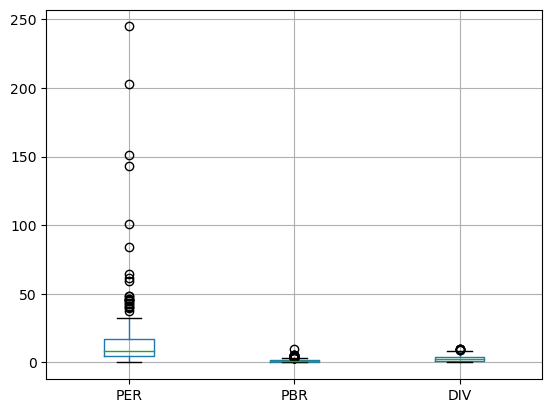

In [12]:
df_kospi_div_sorted.boxplot(column=['PER', 'PBR', 'DIV'])

In [13]:
df_kospi_div_top_100 = df_kospi_div_sorted.head(100)
df_kospi_div_top_100

,Name,BPS,PER,PBR,EPS,DIV,DPS
175330,JB금융지주,23551.0,2.77,0.35,2996.0,10.07,835.0
001120,LX인터내셔널,62867.0,2.10,0.48,14325.0,9.95,3000.0
316140,우리금융지주,39505.0,2.82,0.30,4191.0,9.58,1130.0
024110,기업은행,36302.0,3.04,0.28,3320.0,9.50,960.0
138930,BNK금융지주,30468.0,2.77,0.22,2404.0,9.40,625.0
...,...,...,...,...,...,...,...
353200,대덕전자,17302.0,5.60,1.15,3570.0,2.00,400.0
007310,오뚜기,528433.0,5.73,0.87,80501.0,1.95,9000.0
079550,LIG넥스원,42909.0,13.83,1.82,5641.0,1.92,1500.0
035250,강원랜드,16846.0,32.18,1.09,570.0,1.91,350.0


In [14]:
# 배당금 상위 100개 기업 통계 
df_kospi_div_top_100.describe()

,BPS,PER,PBR,EPS,DIV,DPS
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.387006e+05,13.114300,0.736800,12241.290000,4.369699,3086.140000
std,2.558584e+05,30.543088,0.548883,23774.494444,2.158513,3447.267951
min,0.000000e+00,0.000000,0.000000,0.000000,1.890000,120.000000
25%,3.166550e+04,3.870000,0.370000,2256.000000,2.657500,982.500000
50%,6.954050e+04,7.025000,0.545000,5978.500000,3.560000,1855.000000
75%,1.467438e+05,10.350000,0.962500,13663.500000,5.957500,3500.000000
max,2.272640e+06,244.740000,3.270000,213453.000000,10.070000,20000.000000


In [15]:
df_kospi_div_top_100.boxplot(column=['PER', 'PBR', 'DIV'])

<AxesSubplot:>

In [16]:
df_kospi_div_top_100.to_excel('코스피_배당률_Top100-' + latest_date + '.xlsx')

In [17]:
# 배당금 상위 100개 기업 평균 데이터
df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()
df_kospi_div_top_100_mean

C:\Users\shaws\AppData\Local\Temp\ipykernel_2072\860826845.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_kospi_div_top_100_mean = df_kospi_div_top_100.mean()


BPS    138700.570000
PER        13.114300
PBR         0.736800
EPS     12241.290000
DIV         4.369699
DPS      3086.140000
dtype: float64

In [18]:
# 배당금 상위 100개 중 PER, PBR, DIV 기준 평균 초과 기업, 
df_kospi_div_top_100_over_mean = df_kospi_div_top_100[
                     (df_kospi_div_top_100['PER'] < df_kospi_div_top_100_mean['PER']) &
                     (df_kospi_div_top_100['PBR'] < df_kospi_div_top_100_mean['PBR']) &
                     (df_kospi_div_top_100['DIV'] > df_kospi_div_top_100_mean['DIV'])]
df_kospi_div_top_100_over_mean

,Name,BPS,PER,PBR,EPS,DIV,DPS
175330,JB금융지주,23551.0,2.77,0.35,2996.0,10.07,835.0
001120,LX인터내셔널,62867.0,2.10,0.48,14325.0,9.95,3000.0
316140,우리금융지주,39505.0,2.82,0.30,4191.0,9.58,1130.0
024110,기업은행,36302.0,3.04,0.28,3320.0,9.50,960.0
138930,BNK금융지주,30468.0,2.77,0.22,2404.0,9.40,625.0
139130,DGB금융지주,31812.0,3.07,0.22,2266.0,9.35,650.0
029780,삼성카드,73934.0,5.17,0.41,5831.0,8.29,2500.0
086790,하나금융지주,124935.0,3.51,0.33,11803.0,8.08,3350.0
267250,HD현대,105921.0,2.88,0.54,19933.0,8.01,4600.0
005940,NH투자증권,21824.0,10.59,0.43,881.0,7.50,700.0


In [19]:
df_kospi_div_top_100_over_mean.to_excel('코스피_배당률_Top100_중_평균_초과_기업-' + latest_date + '.xlsx')

In [20]:
"""
FIN
"""

'\nFIN\n'